## Estudo de critérios de transição de sigmoides para modelagem matemática de múltiplas ondas epidemiológicas

Testando diferentes filtros

Importando bibliotecas e módulos implementados

In [1]:
# External libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.signal import butter, lfilter

# Implemented modules
import optimize_tg
# Obs: modified version of the new_wave module
import new_wave_filt
from new_wave_filt import get_transition_points

Carregando dados

In [2]:
# Import data
data = pd.read_csv("../Datasets/hokkaido.csv") 
city_name = 'Hokkaido' 
indicator='cases'

acc_data = data.cumulative_confirmed #(Japan)
normalized_acc_data = acc_data / max(acc_data)

t = np.linspace(0, len(acc_data)-1, len(acc_data))

normalized_acc_data = normalized_acc_data.tolist()
daily_data = data.new_confirmed

scaling_factor = 500
acc_data = acc_data / scaling_factor
daily_data = list(daily_data/ scaling_factor)

Definindo condições iniciais de cada sigmoide no modelo

In [3]:
# Initial Conditions

def initial_cond_0(y_t):
    A0 = 2*max(y_t)
    tp0 = (2/3)*len(y_t)
    delta0 = (1/4)*len(y_t)
    nu0 = 1
    return [A0, tp0, delta0, nu0]

optimize_tg.initial_cond = initial_cond_0

def update_cond_nw(A0, tp0):
    # tp0 += 150 # Obs: ideal distance between sigmoids ~ 150 days 
    return [A0, tp0]
optimize_tg.update_cond = update_cond_nw

## Testando diferentes filtros

In [4]:
# Moving average filter
def moving_average(x, win_size):
    filtered = np.convolve(x, np.ones(win_size), 'valid') / win_size
    filtered = np.append(np.zeros(win_size-1), filtered) # fill the w-1 first slots with zeros
    return filtered

# Median filter
def median_filter(x, win_size):
    S = 1
    nrows = ((x.size-win_size)//S)+1
    n = x.strides[0]
    strided = np.lib.stride_tricks.as_strided(x, shape=(nrows,win_size), strides=(S*n,n))
    filtered  = np.median(strided,axis=1)
    filtered = np.append(np.zeros(win_size-1), filtered) # fill the w-1 first slots with zeros
    return filtered

def butterworth_lowpass_filter(data, cutoff_freq, fs, order=2):
    #fs is the sampling rate
    nyq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    # lfilter apply filter along one dimension
    y = lfilter(b, a, data)
    return y

In [5]:
rel_rmse_by_test = {}
rel_rmse_by_test['Interval'] = ['Wave 1', 'Waves 1 to 2', 'Waves 1 to 3', 'Waves 1 to 4', 'Waves 1 to 5']

### 1 - Filtros padrão

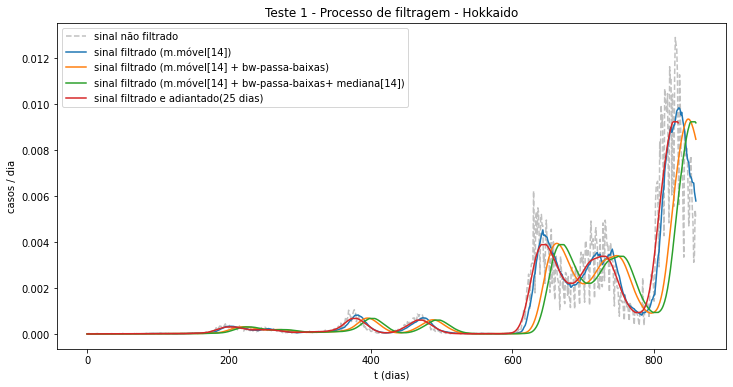

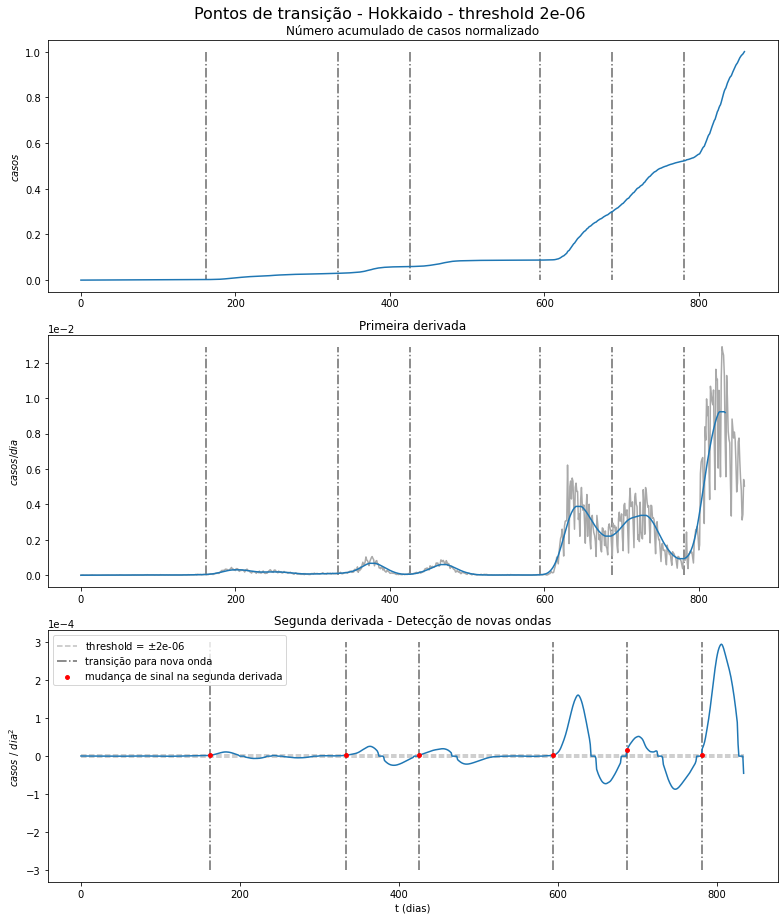

x_nw: [333, 426, 594, 687, 781]


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #1 - A0:39.58449065726447 | tp0:220.51423311045278 | delta0:27.644883780683983 | nu0:1.0 
(optimal) Sigmoid #1 - A0:39.58449065726447 | tp0:220.51423311045278 | delta0:27.644883780683983 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:41.171216986638015 | tp0:373.23174348897714 | delta0:9.867677123787647 | nu0:1.0 
(optimal) Sigmoid #2 - A0:41.171216986638015 | tp0:373.23174348897714 | delta0:9.867677123787647 | nu0:1.0 
Sigmoid #3 - A0:39.0005141277182 | tp0:465.84442807403144 | delta0:10.434844459439862 | nu0:1.0 
(optimal) Sigmoid #3 - A0:39.0005141277182 | tp0:465.84442807403144 | delta0:10.434844459439862 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #4 - A0:276.23213347923473 | tp0:646.1596197930645 | delta0:10.899880365044051 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #4 - A0:276.23213347923473 | tp0:646.1596197930645 | delta0:10.899880365044051 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #5 - A0:289.541731814358 | tp0:724.3580718286743 | delta0:13.93805679709906 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


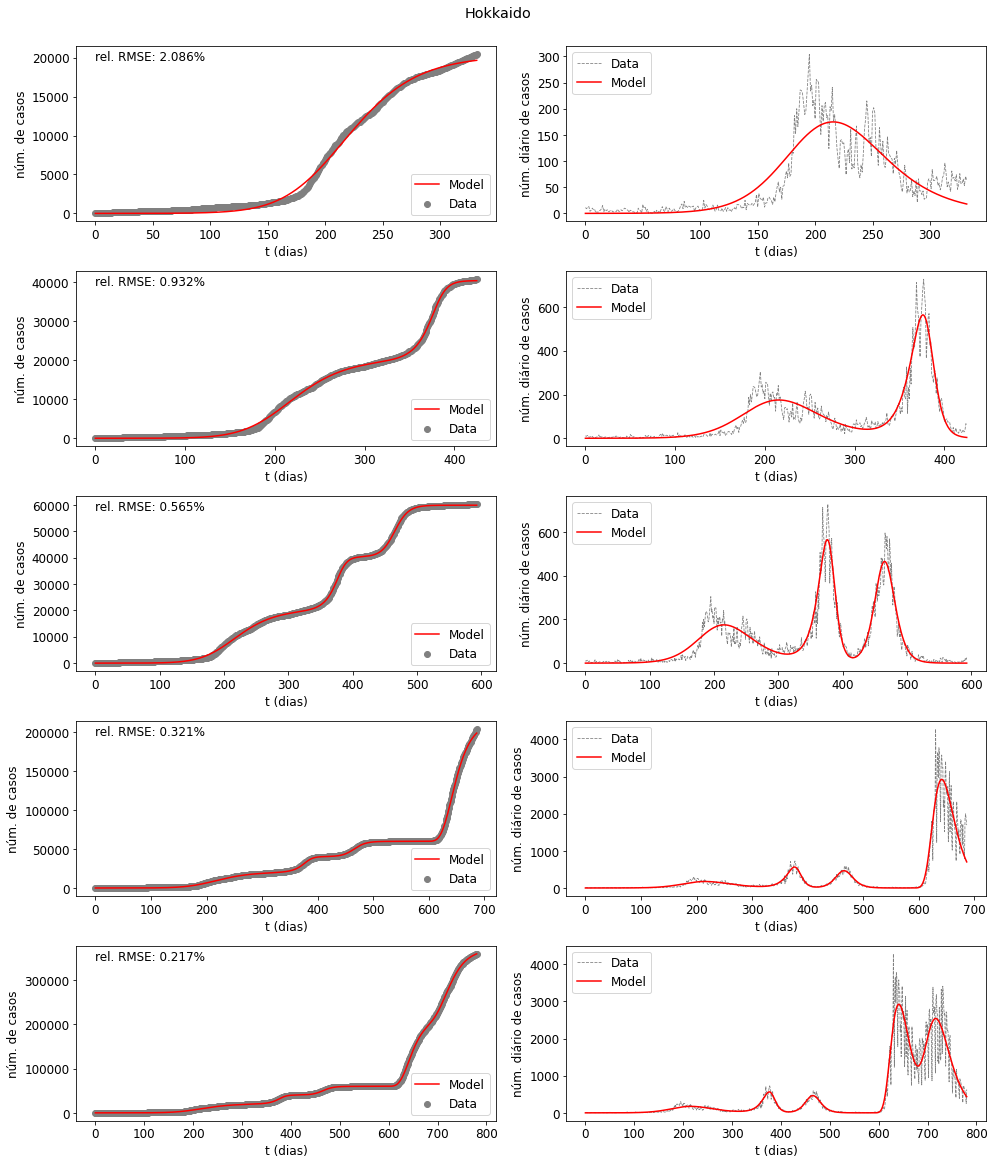

In [6]:
def filter_data(data):    

    plt.figure(figsize=(12, 6))
    plt.title(f"Teste 1 - Processo de filtragem - {city_name}")
    plt.xlabel("t (dias)")
    plt.ylabel("casos / dia")

    # Plotting unfiltered version
    plt.plot(data, label="sinal não filtrado", c='silver', linestyle='dashed')

    # Moving average with 14-day window
    filtered_data = moving_average(data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14])")
    
    # 2nd Order Low-Pass Filter with 14-day window
    order = 2
    fs = len(data) # sampling rate       
    cutoff = 14 # cutoff freq.
    filtered_data =  butterworth_lowpass_filter(filtered_data, cutoff, fs, order)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas)")

    # Median filter with 14-day window
    filtered_data = median_filter(filtered_data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas+ mediana[14])")

    # Reduce the delay effect introduced by the filtering process
    # Advance the signal by 25 days
    n_days_shift = 25
    filtered_data = filtered_data[n_days_shift:]    
    plt.plot(filtered_data, label=f"sinal filtrado e adiantado({n_days_shift} dias)")

    plt.legend()

    #plt.savefig(f'Figuras/TG_filtering_process_{city_name}.png', dpi=600)
    plt.show()

    return filtered_data

new_wave_filt.filter_data = filter_data

# =================================================================================================

# Transition Points
x_nw = get_transition_points(acc_data, visual=True, city_name=city_name, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:6]

print('x_nw:', x_nw)

sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 0,
                               scaling_factor = scaling_factor
                            )

rel_rmse_by_test['Filtragem Padrão'] = rel_rmse_list

### ~~2 - Só média móvel~~ [CANCELADO]

In [7]:
# def filter_data(data):    

#     plt.figure(figsize=(12, 6))
#     plt.title(f"Filtering process - {city_name}")
#     plt.xlabel("t (days)")
#     plt.ylabel("cases / day")

#     # Plotting unfiltered version
#     plt.plot(data, label="unfiltered", c='silver', linestyle='dashed')

#     # Moving average with 21-day window
#     filtered_data = moving_average(data, 21)
#     plt.plot(filtered_data, label="filtered (ma-21)")

#     plt.legend()
#     plt.show()

#     return filtered_data

# new_wave_filt.filter_data = filter_data

# # =================================================================================================

# # Transition Points
# x_nw = get_transition_points(acc_data, visual=True, city_name=city_name, threshold=4e-5, indicator = indicator)
# x_nw = x_nw[1:6]

# print('x_nw:', x_nw)

# sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
#                                daily_data, 
#                                city_name, 
#                                x_nw, 
#                                indicator = indicator, 
#                                n_weeks_pred = 0,
#                                scaling_factor = scaling_factor
#                             )

# rel_rmse_by_test['Test 2'] = rel_rmse_list

### 3 - Só filtro butterworth + avanço do sinal

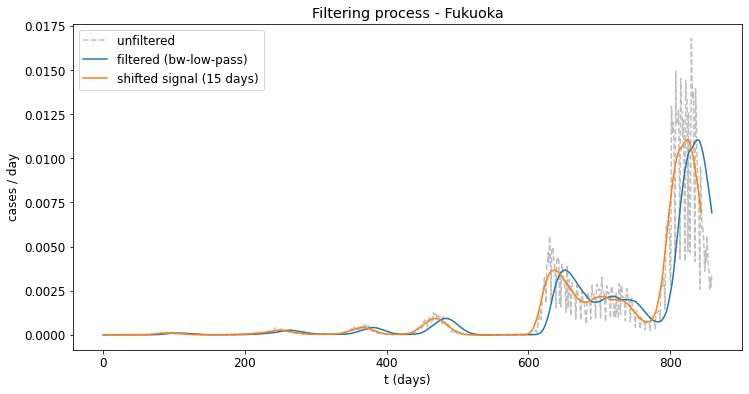

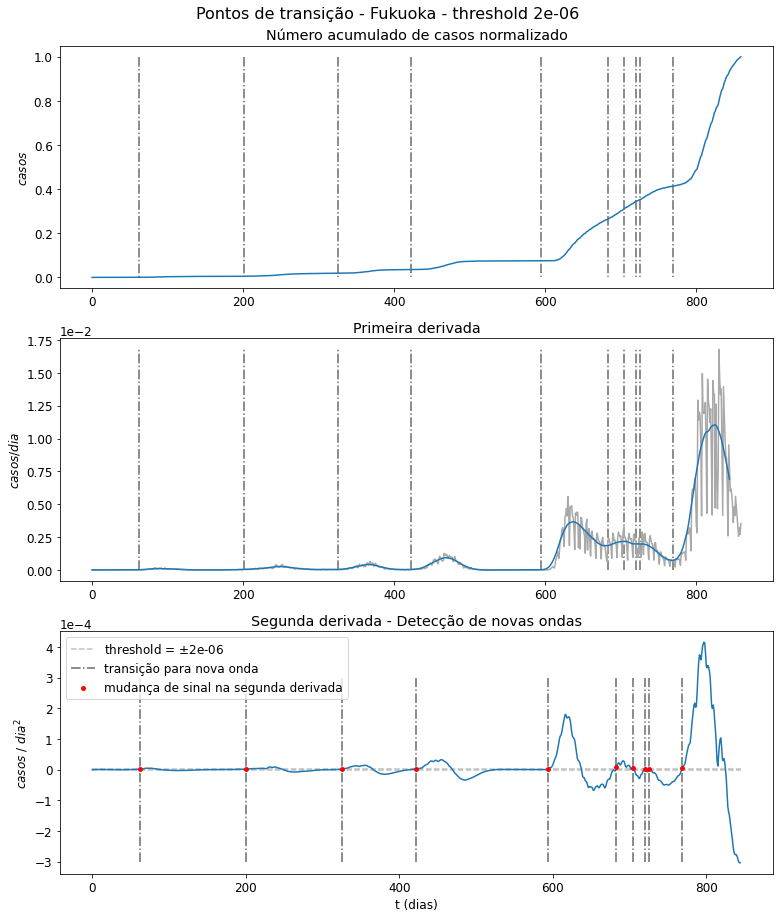

x_nw: [201, 326, 422, 594, 683]


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #1 - A0:9.11561124422068 | tp0:93.0921191840642 | delta0:11.001543998116404 | nu0:1.0 
(optimal) Sigmoid #1 - A0:9.11561124422068 | tp0:93.0921191840642 | delta0:11.001543998116404 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:26.796677835780898 | tp0:248.15950150637855 | delta0:13.310024121450793 | nu0:1.0 
(optimal) Sigmoid #2 - A0:26.796677835780898 | tp0:248.15950150637855 | delta0:13.310024121450793 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:33.80127374048459 | tp0:364.99166552418126 | delta0:9.357027467126375 | nu0:1.0 
(optimal) Sigmoid #3 - A0:33.80127374048459 | tp0:364.99166552418126 | delta0:9.357027467126375 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #4 - A0:78.26771741189226 | tp0:468.0331595174854 | delta0:9.261171882085321 | nu0:1.0 
(optimal) Sigmoid #4 - A0:78.26771741189226 | tp0:468.0331595174854 | delta0:9.261171882085321 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #5 - A0:361.0781422861629 | tp0:642.9348860038501 | delta0:10.678576650805882 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


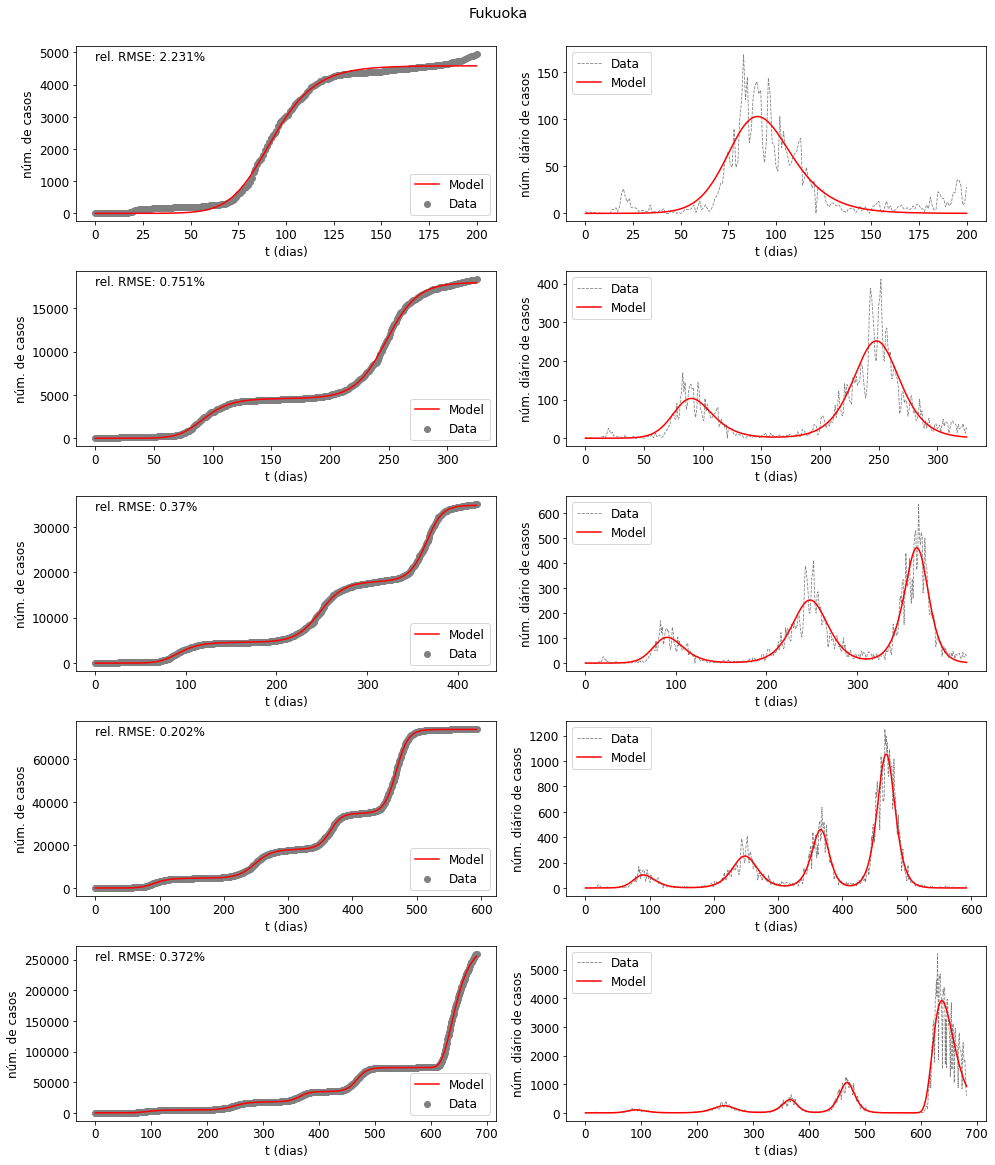

In [36]:
def filter_data(data):    

    plt.figure(figsize=(12, 6))
    plt.title(f"Filtering process - {city_name}")
    plt.xlabel("t (days)")
    plt.ylabel("cases / day")

    # Plotting unfiltered version
    plt.plot(data, label="unfiltered", c='silver', linestyle='dashed')

    # 2nd Order Low-Pass Filter with 14-day window
    order = 2
    fs = len(data) # sampling rate       
    cutoff = 14 # cutoff freq.
    filtered_data =  butterworth_lowpass_filter(data, cutoff, fs, order)
    plt.plot(filtered_data, label="filtered (bw-low-pass)")

    # Reduce the delay effect introduced by the filtering process
    # Advance the signal by 15 days
    n_days_shift = 15
    filtered_data = filtered_data[n_days_shift:]    
    plt.plot(filtered_data, label=f"shifted signal ({n_days_shift} days)")

    plt.legend()
    plt.show()

    return filtered_data

new_wave_filt.filter_data = filter_data

# =================================================================================================

# Transition Points
x_nw = get_transition_points(acc_data, visual=True, city_name=city_name, threshold=2e-6, indicator = indicator)
x_nw = x_nw[1:6]

print('x_nw:', x_nw)

sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
                               daily_data, 
                               city_name, 
                               x_nw, 
                               indicator = indicator, 
                               n_weeks_pred = 0,
                               scaling_factor = scaling_factor
                            )

rel_rmse_by_test['BW'] = rel_rmse_list

### ~~4 - Só mediana + avanço~~ [CANCELADO]

In [9]:
# def filter_data(data):    

#     plt.figure(figsize=(12, 6))
#     plt.title(f"Filtering process - {city_name}")
#     plt.xlabel("t (days)")
#     plt.ylabel("cases / day")

#     # Plotting unfiltered version
#     plt.plot(data, label="unfiltered", c='silver', linestyle='dashed')

#     # Median filter with 14-day window
#     filtered_data = median_filter(data, 14)
#     plt.plot(filtered_data, label="filtered (median-14)")

#     # Reduce the delay effect introduced by the filtering process
#     # Advance the signal by 5 days
#     n_days_shift = 5
#     filtered_data = filtered_data[n_days_shift:]    
#     plt.plot(filtered_data, label=f"shifted signal ({n_days_shift} days)")

#     plt.legend()
#     plt.show()

#     return filtered_data

# new_wave_filt.filter_data = filter_data

# # =================================================================================================

# # Transition Points
# x_nw = get_transition_points(acc_data, visual=True, city_name=city_name, threshold=2e-5, indicator = indicator)
# x_nw = x_nw[1:6]

# print('x_nw:', x_nw)

# sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
#                                daily_data, 
#                                city_name, 
#                                x_nw, 
#                                indicator = indicator, 
#                                n_weeks_pred = 0,
#                                scaling_factor = scaling_factor
#                             )

# #rel_rmse_by_test['Test 4'] = rel_rmse_list

### ~~5 - Média móvel + Mediana + avanço~~ [CANCELADO]

In [10]:
# def filter_data(data):    

#     plt.figure(figsize=(12, 6))
#     plt.title(f"Filtering process - {city_name}")
#     plt.xlabel("t (days)")
#     plt.ylabel("cases / day")

#     # Plotting unfiltered version
#     plt.plot(data, label="unfiltered", c='silver', linestyle='dashed')

#     # Moving average with 14-day window
#     filtered_data = moving_average(data, 14)
#     plt.plot(filtered_data, label="filtered (ma-14)")
#     # Median filter with 14-day window
#     filtered_data = median_filter(filtered_data, 14)
#     plt.plot(filtered_data, label="filtered (ma-14 + median-14)")

#     # Reduce the delay effect introduced by the filtering process
#     # Advance the signal by 25 days
#     n_days_shift = 10
#     filtered_data = filtered_data[n_days_shift:]    
#     plt.plot(filtered_data, label=f"shifted signal ({n_days_shift} days)")

#     plt.legend()
#     plt.show()

#     return filtered_data

# new_wave_filt.filter_data = filter_data

# # =================================================================================================

# # Transition Points
# x_nw = get_transition_points(acc_data, visual=True, city_name=city_name, threshold=2e-5, indicator = indicator)
# x_nw = x_nw[1:6]

# print('x_nw:', x_nw)

# sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
#                                daily_data, 
#                                city_name, 
#                                x_nw, 
#                                indicator = indicator, 
#                                n_weeks_pred = 0,
#                                scaling_factor = scaling_factor
#                             )

# #rel_rmse_by_test['Test 5'] = rel_rmse_list

### Resumo dos resultados

- Teste 1 - Filtragem padrão _(ma-14 + bw-low-pass + median-14 + shift-25)_

- Teste 2 - Apenas filtro de média móvel _(ma-21)_

- Teste 3 - Apenas filtro passa baixas Butterworth _(bw-low-pass + shift-15)_

- Teste 4 - Apenas filtro de mediana _(median-14 + shift-5)_
    
- Teste 5 - Média móvel + Mediana _(ma-14 + median-14 + shift-10)_

In [11]:
pd.DataFrame(rel_rmse_by_test)

Interval Filtragem Padrão      BW
0        Wave 1           1.712%  1.712%
1  Waves 1 to 2           0.514%  0.533%
2  Waves 1 to 3           0.331%  0.318%
3  Waves 1 to 4            0.16%  0.156%
4  Waves 1 to 5           0.182%  0.181%

Teste 3, que aplica apenas o filtro Butterworth passa baixas, apresentou os menores valores de rRMSE.

### Bônus - Experimentando frequência de corte do Butterworth
Teste antigo que fiz, mas agora com dados do Japão

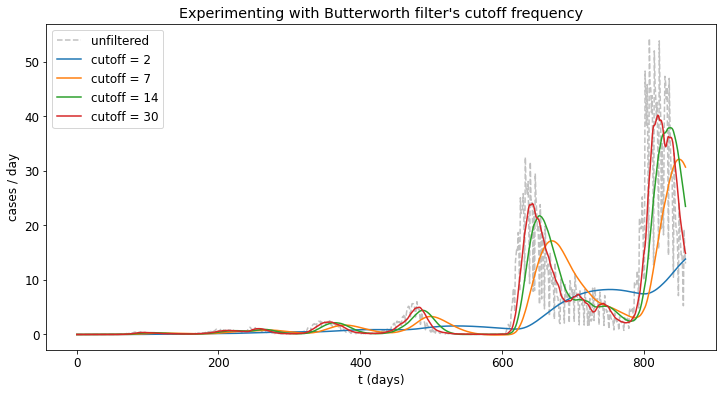

In [12]:
plt.figure(figsize=(12,6))
plt.title("Experimenting with Butterworth filter's cutoff frequency")
plt.xlabel("t (days)")
plt.ylabel("cases / day")

unf_daily_n_cases = daily_data

plt.plot(unf_daily_n_cases, label="unfiltered", c='silver', linestyle='dashed')

order = 2
fs = len(data) # sampling rate       

cutoff = 2 # cutoff freq.
filtered =  butterworth_lowpass_filter(unf_daily_n_cases, cutoff, fs, order)
plt.plot(filtered, label=f"cutoff = {cutoff}")

cutoff = 7 # cutoff freq.
filtered =  butterworth_lowpass_filter(unf_daily_n_cases, cutoff, fs, order)
plt.plot(filtered, label=f"cutoff = {cutoff}")

cutoff = 14 # cutoff freq.
filtered =  butterworth_lowpass_filter(unf_daily_n_cases, cutoff, fs, order)
plt.plot(filtered, label=f"cutoff = {cutoff}")

cutoff = 30 # cutoff freq.
filtered =  butterworth_lowpass_filter(unf_daily_n_cases, cutoff, fs, order)
plt.plot(filtered, label=f"cutoff = {cutoff}")

plt.legend()
plt.show()


##=============================================================================

### Filtragem padrão (todos os filtros)

In [13]:
def filter_data(data):    

    plt.figure(figsize=(12, 6))
    plt.title(f"Processo de filtragem - {city_name}")
    plt.xlabel("t (dias)")
    plt.ylabel("número de casos por dia normalizado")

    # Plotting unfiltered version
    plt.plot(data, label="sinal não filtrado", c='silver', linestyle='dashed')

    # Moving average with 14-day window
    filtered_data = moving_average(data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14])")
    
    # 2nd Order Low-Pass Filter with 14-day window
    order = 2
    fs = len(data) # sampling rate       
    cutoff = 14 # cutoff freq.
    filtered_data =  butterworth_lowpass_filter(filtered_data, cutoff, fs, order)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas)")

    # Median filter with 14-day window
    filtered_data = median_filter(filtered_data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas+ mediana[14])")

    # Reduce the delay effect introduced by the filtering process
    # Advance the signal by 25 days
    n_days_shift = 25
    filtered_data = filtered_data[n_days_shift:]    
    plt.plot(filtered_data, label=f"sinal filtrado e adiantado({n_days_shift} dias)")

    plt.legend()

    plt.show()

    return filtered_data

new_wave_filt.filter_data = filter_data

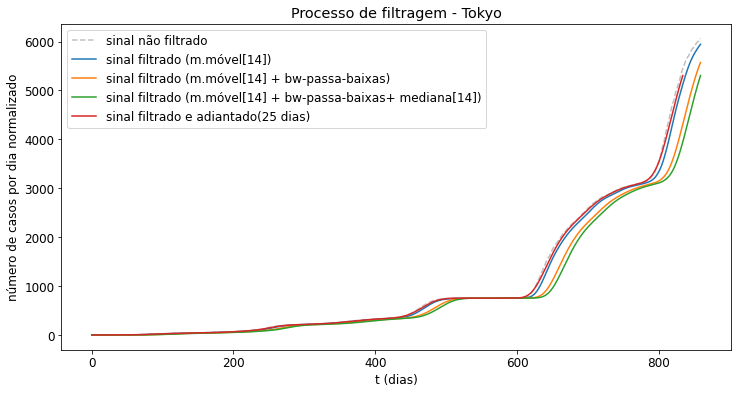

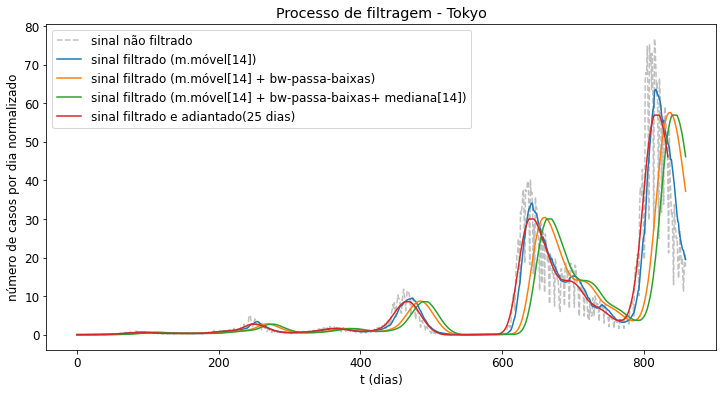

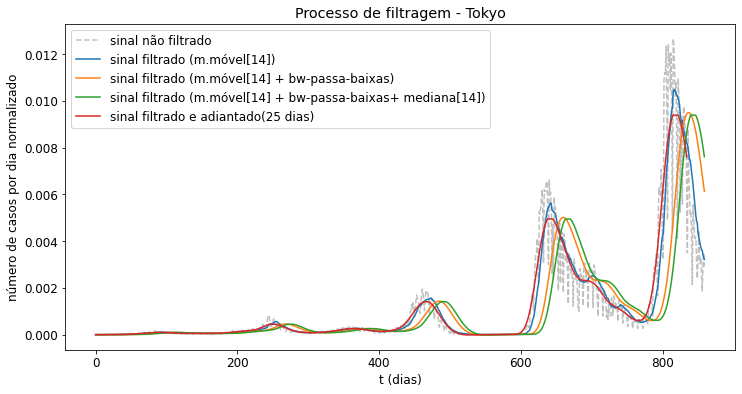

x_nw: [179, 318, 409, 592, 770]
Sigmoid #1 - A0:50.78212737160569 | tp0:103.28125437933235 | delta0:22.234902323785068 | nu0:1.0 
(optimal) Sigmoid #1 - A0:50.78212737160569 | tp0:103.28125437933235 | delta0:22.234902323785068 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:166.95111850941487 | tp0:245.27673172085943 | delta0:16.648595376006316 | nu0:1.0 
(optimal) Sigmoid #2 - A0:166.95111850941487 | tp0:245.27673172085943 | delta0:16.648595376006316 | nu0:1.0 
Sigmoid #3 - A0:110.66984155661581 | tp0:360.57655584603305 | delta0:16.009985407168323 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #3 - A0:110.66984155661581 | tp0:360.57655584603305 | delta0:16.009985407168323 | nu0:1.0 
Sigmoid #4 - A0:407.52760757841696 | tp0:462.1835636643835 | delta0:10.314978341591285 | nu0:1.0 
(optimal) Sigmoid #4 - A0:407.52760757841696 | tp0:462.1835636643835 | delta0:10.314978341591285 | nu0:1.0 
Sigmoid #5 - A0:2223.7019760782473 | tp0:660.5250360158942 | delta0:20.53398175894974 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


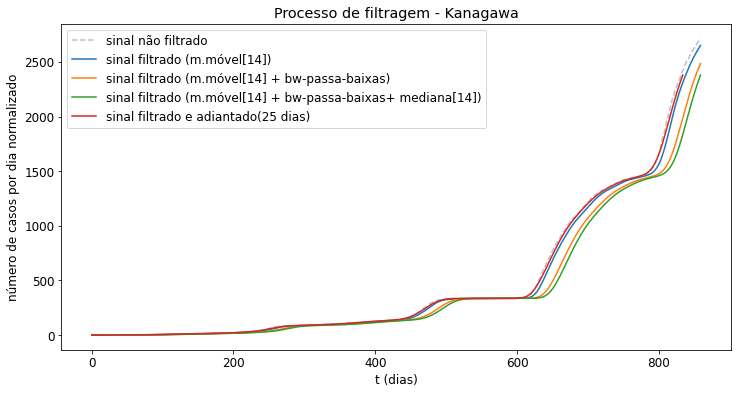

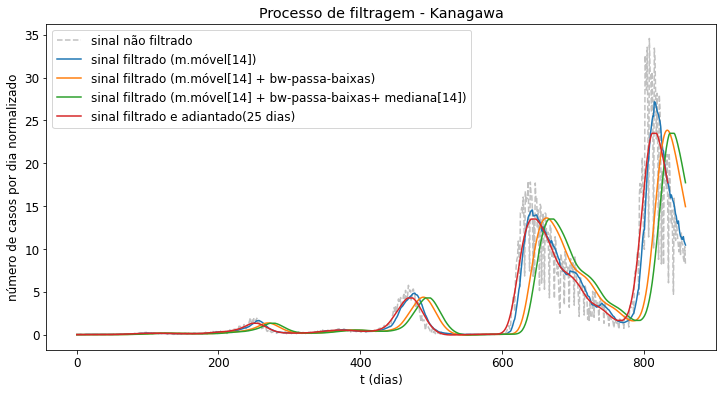

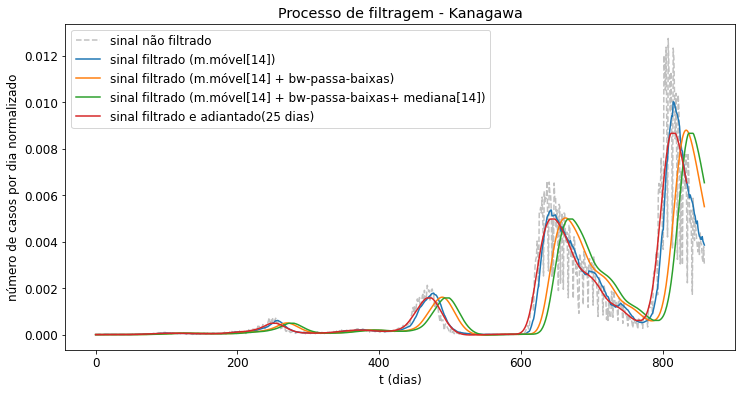

x_nw: [205, 328, 414, 593, 771]
Sigmoid #1 - A0:23.517504039094135 | tp0:146.48412347195253 | delta0:34.8778742148201 | nu0:1.0 
(optimal) Sigmoid #1 - A0:23.517504039094135 | tp0:146.48412347195253 | delta0:34.8778742148201 | nu0:1.0 
Sigmoid #2 - A0:61.35323833262491 | tp0:247.44491563850733 | delta0:11.85109435372681 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #2 - A0:61.35323833262491 | tp0:247.44491563850733 | delta0:11.85109435372681 | nu0:1.0 
Sigmoid #3 - A0:38.816462248176414 | tp0:369.9965906681222 | delta0:17.177369968667442 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


(optimal) Sigmoid #3 - A0:38.816462248176414 | tp0:369.9965906681222 | delta0:17.177369968667442 | nu0:1.0 
Sigmoid #4 - A0:190.4497710196377 | tp0:466.1451277565594 | delta0:9.538493342701292 | nu0:1.0 
(optimal) Sigmoid #4 - A0:190.4497710196377 | tp0:466.1451277565594 | delta0:9.538493342701292 | nu0:1.0 
Sigmoid #5 - A0:1068.3152720048188 | tp0:662.4245473570318 | delta0:20.183522759762372 | nu0:1.0 


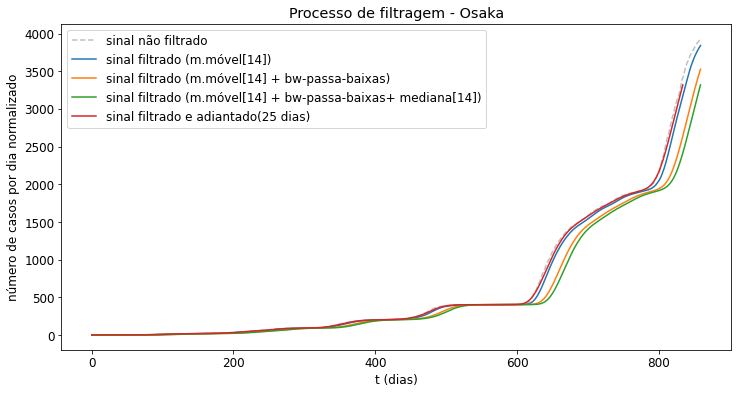

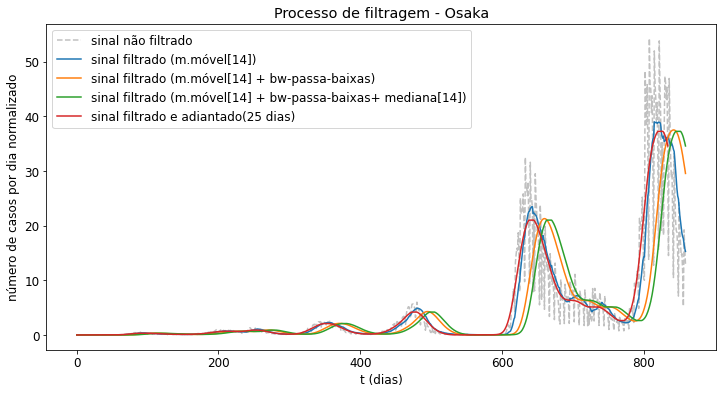

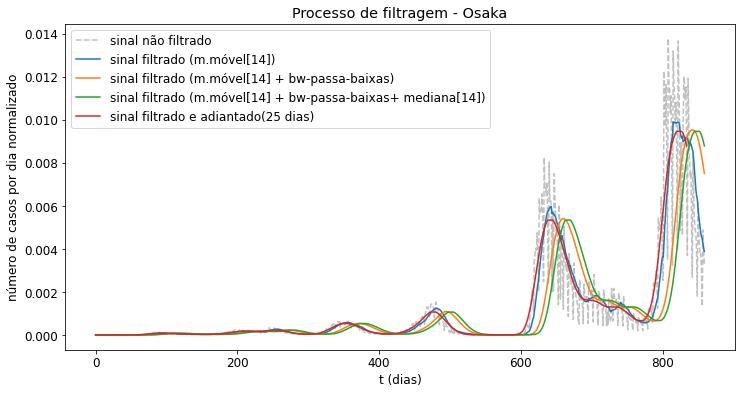

x_nw: [171, 233, 307, 418, 591]
Sigmoid #1 - A0:19.20972729900583 | tp0:99.56140716041266 | delta0:14.530072114851542 | nu0:1.0 
(optimal) Sigmoid #1 - A0:19.20972729900583 | tp0:99.56140716041266 | delta0:14.530072114851542 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:37.70313246727903 | tp0:207.53796920069672 | delta0:12.05237508040099 | nu0:1.0 
(optimal) Sigmoid #2 - A0:37.70313246727903 | tp0:207.53796920069672 | delta0:12.05237508040099 | nu0:1.0 
Sigmoid #3 - A0:24.584594331693758 | tp0:255.31814333894852 | delta0:7.151912657778497 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


(optimal) Sigmoid #3 - A0:24.584594331693758 | tp0:255.31814333894852 | delta0:7.151912657778497 | nu0:1.0 
Sigmoid #4 - A0:109.3665284415976 | tp0:351.02113495772943 | delta0:11.330025887177463 | nu0:1.0 
(optimal) Sigmoid #4 - A0:109.3665284415976 | tp0:351.02113495772943 | delta0:11.330025887177463 | nu0:1.0 
Sigmoid #5 - A0:198.68664839098494 | tp0:471.88335205615317 | delta0:10.470159147675588 | nu0:1.0 


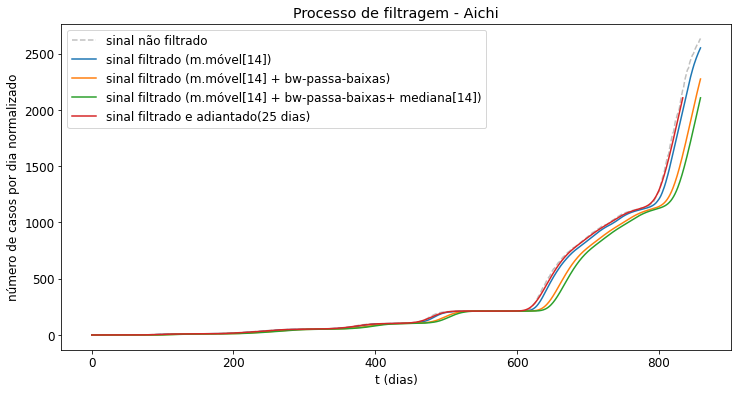

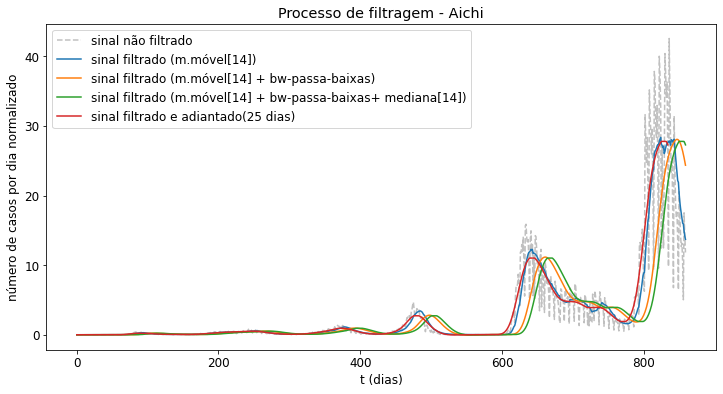

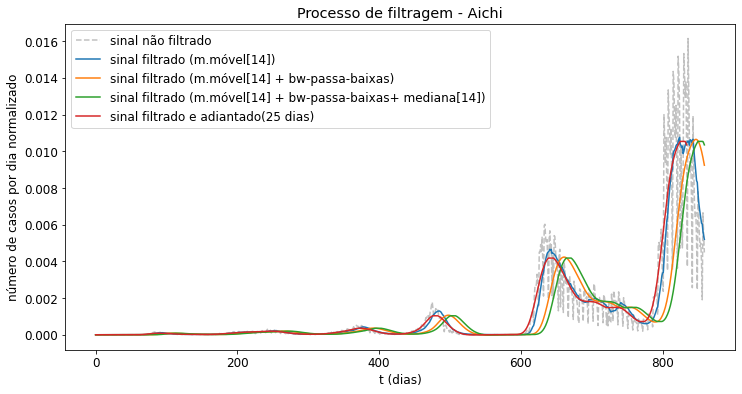

x_nw: [171, 232, 319, 431, 594]
Sigmoid #1 - A0:9.907985075841356 | tp0:93.64514408269798 | delta0:10.367622892473465 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #1 - A0:9.907985075841356 | tp0:93.64514408269798 | delta0:10.367622892473465 | nu0:1.0 
Sigmoid #2 - A0:8.29921389214259 | tp0:168.11997135039215 | delta0:0.001000000000000104 | nu0:1.0 
(optimal) Sigmoid #2 - A0:8.29921389214259 | tp0:168.11997135039215 | delta0:0.001000000000000104 | nu0:1.0 
Sigmoid #3 - A0:15.802790240320338 | tp0:168.11997135039215 | delta0:0.001000000000000104 | nu0:1.0 
(optimal) Sigmoid #3 - A0:15.802790240320338 | tp0:168.11997135039215 | delta0:0.001000000000000104 | nu0:1.0 
Sigmoid #4 - A0:19.580823739746993 | tp0:168.11997135039215 | delta0:0.001000000000000104 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:19: RuntimeWarning: overflow encountered in exp
  g = lambda x: np.exp(-1*(t - tp)/delta)
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


(optimal) Sigmoid #4 - A0:19.580823739746993 | tp0:168.11997135039215 | delta0:0.001000000000000104 | nu0:1.0 
Sigmoid #5 - A0:48.91836232477904 | tp0:168.11997135039215 | delta0:0.001000000000000104 | nu0:1.0 


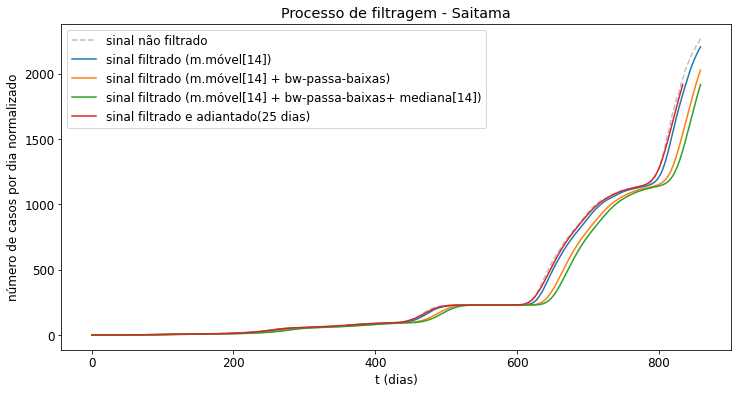

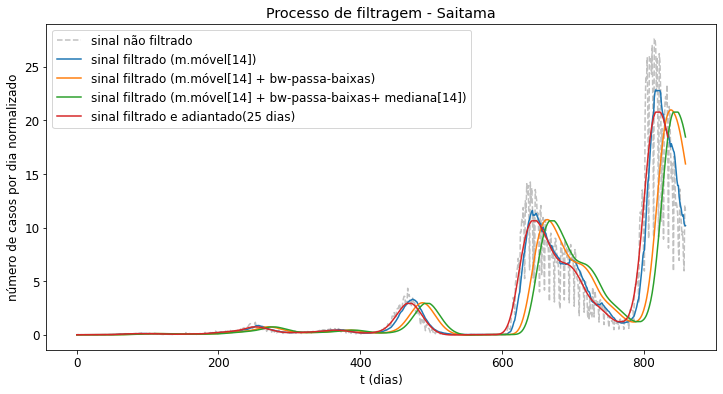

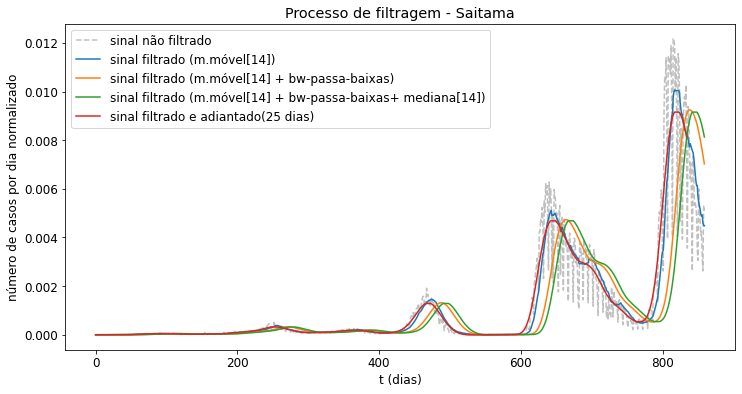

x_nw: [181, 333, 415, 593, 771]
Sigmoid #1 - A0:9.563998651397066 | tp0:104.95995403406134 | delta0:22.811313803922065 | nu0:1.0 
(optimal) Sigmoid #1 - A0:9.563998651397066 | tp0:104.95995403406134 | delta0:22.811313803922065 | nu0:1.0 
Sigmoid #2 - A0:52.5191122137106 | tp0:250.1087098200332 | delta0:19.404694585526013 | nu0:1.0 
(optimal) Sigmoid #2 - A0:52.5191122137106 | tp0:250.1087098200332 | delta0:19.404694585526013 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:25.62611479133778 | tp0:362.63361622250386 | delta0:13.4510771398142 | nu0:1.0 
(optimal) Sigmoid #3 - A0:25.62611479133778 | tp0:362.63361622250386 | delta0:13.4510771398142 | nu0:1.0 
Sigmoid #4 - A0:136.388905242514 | tp0:465.82314110845664 | delta0:9.937836021184566 | nu0:1.0 
(optimal) Sigmoid #4 - A0:136.388905242514 | tp0:465.82314110845664 | delta0:9.937836021184566 | nu0:1.0 
Sigmoid #5 - A0:878.0011901131335 | tp0:665.4941263918986 | delta0:20.864899109595942 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


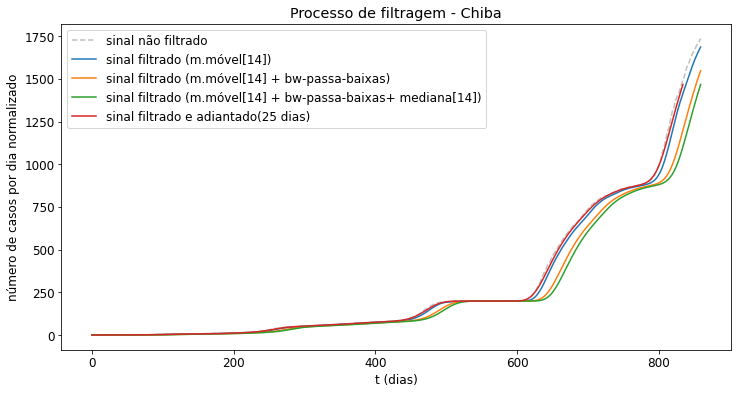

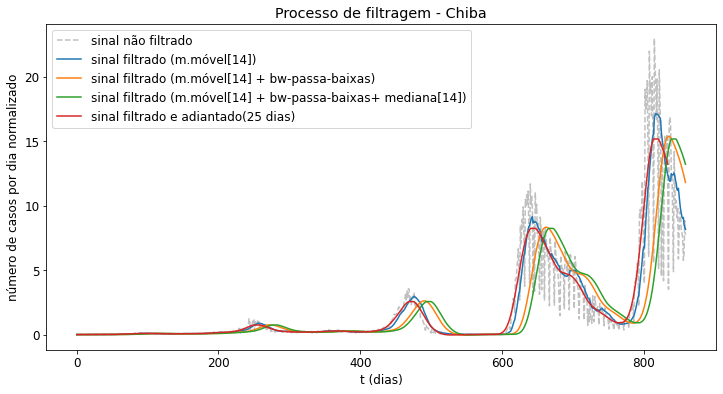

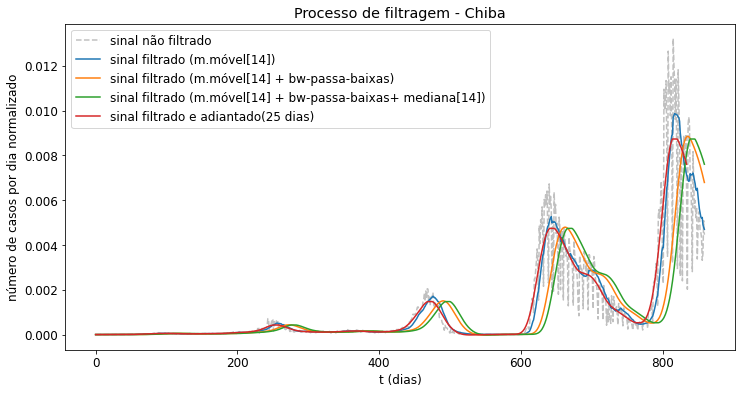

x_nw: [186, 210, 411, 593, 770]
Sigmoid #1 - A0:8.986727369082514 | tp0:120.02575564130734 | delta0:25.217764547116616 | nu0:1.0 
(optimal) Sigmoid #1 - A0:8.986727369082514 | tp0:120.02575564130734 | delta0:25.217764547116616 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:17.908581304735534 | tp0:223.52920168399234 | delta0:12.208500425900707 | nu0:1.0 
(optimal) Sigmoid #2 - A0:17.908581304735534 | tp0:223.52920168399234 | delta0:12.208500425900707 | nu0:1.0 
Sigmoid #3 - A0:45.536009919941186 | tp0:301.481314720337 | delta0:29.918465806363294 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #3 - A0:45.536009919941186 | tp0:301.481314720337 | delta0:29.918465806363294 | nu0:1.0 
Sigmoid #4 - A0:121.36155185161202 | tp0:465.53313813149595 | delta0:10.822898629830066 | nu0:1.0 
(optimal) Sigmoid #4 - A0:121.36155185161202 | tp0:465.53313813149595 | delta0:10.822898629830066 | nu0:1.0 
Sigmoid #5 - A0:654.4965356448415 | tp0:663.1736028608822 | delta0:20.408564390584402 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


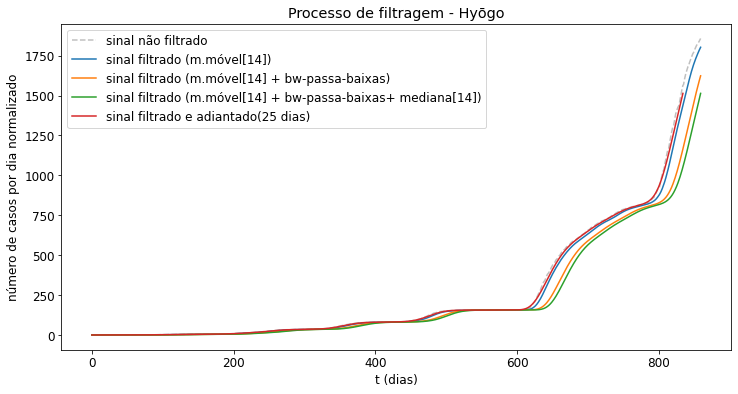

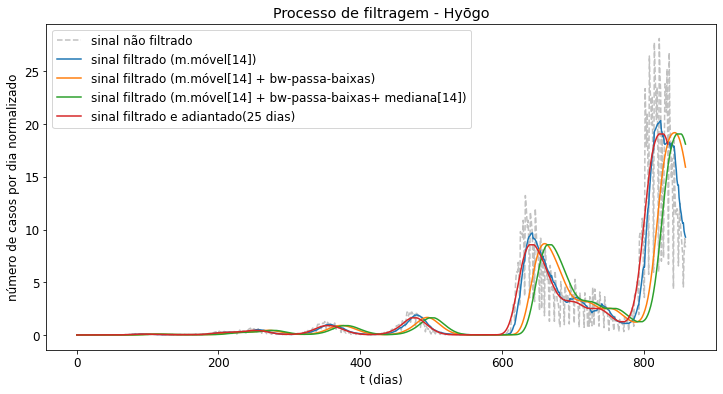

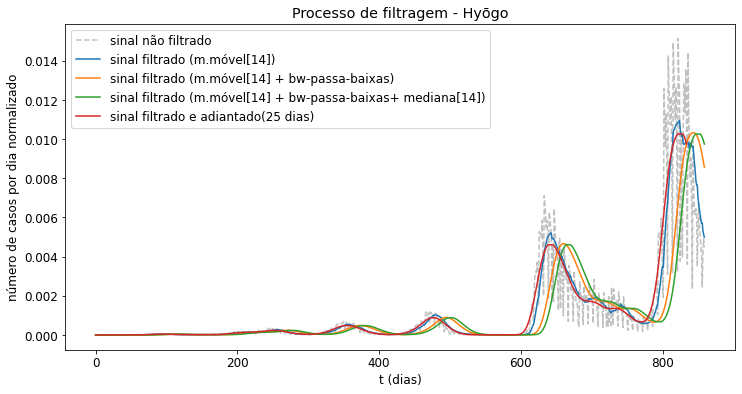

x_nw: [228, 307, 421, 594, 774]
Sigmoid #1 - A0:887.7424379175766 | tp0:459.15399443951634 | delta0:56.94063545989082 | nu0:1.0 
(optimal) Sigmoid #1 - A0:887.7424379175766 | tp0:459.15399443951634 | delta0:56.94063545989082 | nu0:1.0 
Sigmoid #2 - A0:886.9120523010182 | tp0:472.37625521524 | delta0:7.964734418950129 | nu0:1.0 
(optimal) Sigmoid #2 - A0:886.9120523010182 | tp0:472.37625521524 | delta0:7.964734418950129 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:19: RuntimeWarning: overflow encountered in exp
  g = lambda x: np.exp(-1*(t - tp)/delta)
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in deriv_f_t (vectorized)
  outputs = ufunc(*inputs)


Sigmoid #3 - A0:886.9012185607838 | tp0:473.58182162149 | delta0:0.0010000000000012221 | nu0:1.0 
(optimal) Sigmoid #3 - A0:886.9012185607838 | tp0:473.58182162149 | delta0:0.0010000000000012221 | nu0:1.0 
Sigmoid #4 - A0:-1.860257725638803e-08 | tp0:473.58182162149 | delta0:0.0010000000000012221 | nu0:1.0 
(optimal) Sigmoid #4 - A0:-1.860257725638803e-08 | tp0:473.58182162149 | delta0:0.0010000000000012221 | nu0:1.0 
Sigmoid #5 - A0:-1.860257725638803e-08 | tp0:473.58182162149 | delta0:0.0010000000000012221 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


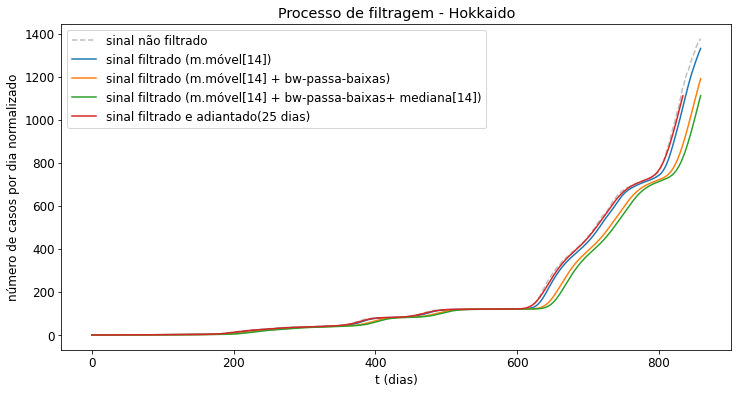

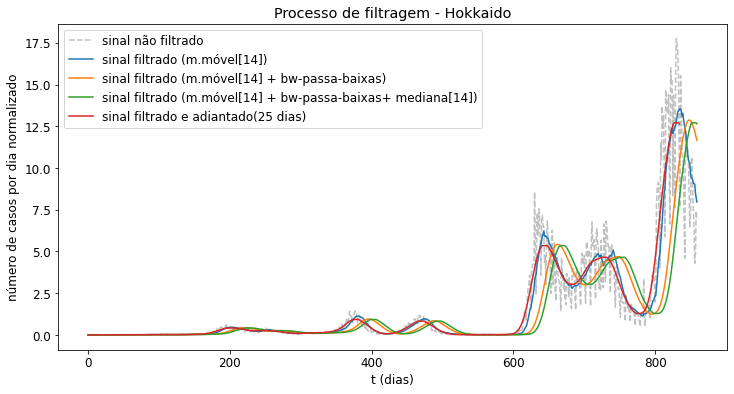

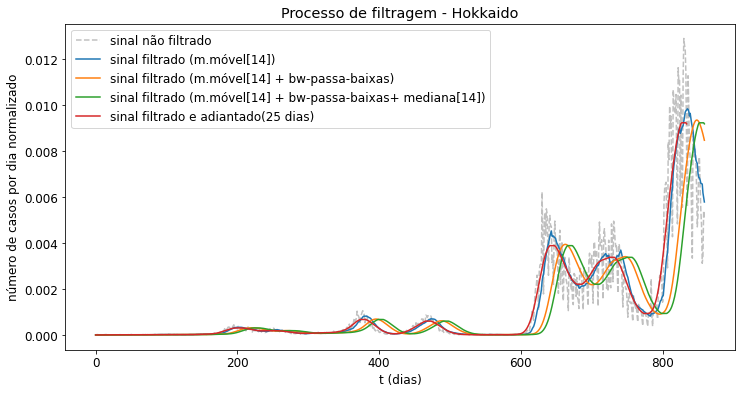

x_nw: [333, 426, 594, 687, 781]
Sigmoid #1 - A0:39.58449065726447 | tp0:220.51423311045278 | delta0:27.644883780683983 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #1 - A0:39.58449065726447 | tp0:220.51423311045278 | delta0:27.644883780683983 | nu0:1.0 
Sigmoid #2 - A0:41.171216986638015 | tp0:373.23174348897714 | delta0:9.867677123787647 | nu0:1.0 
(optimal) Sigmoid #2 - A0:41.171216986638015 | tp0:373.23174348897714 | delta0:9.867677123787647 | nu0:1.0 
Sigmoid #3 - A0:39.0005141277182 | tp0:465.84442807403144 | delta0:10.434844459439862 | nu0:1.0 
(optimal) Sigmoid #3 - A0:39.0005141277182 | tp0:465.84442807403144 | delta0:10.434844459439862 | nu0:1.0 
Sigmoid #4 - A0:276.23213347923473 | tp0:646.1596197930645 | delta0:10.899880365044051 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


(optimal) Sigmoid #4 - A0:276.23213347923473 | tp0:646.1596197930645 | delta0:10.899880365044051 | nu0:1.0 
Sigmoid #5 - A0:289.541731814358 | tp0:724.3580718286743 | delta0:13.93805679709906 | nu0:1.0 


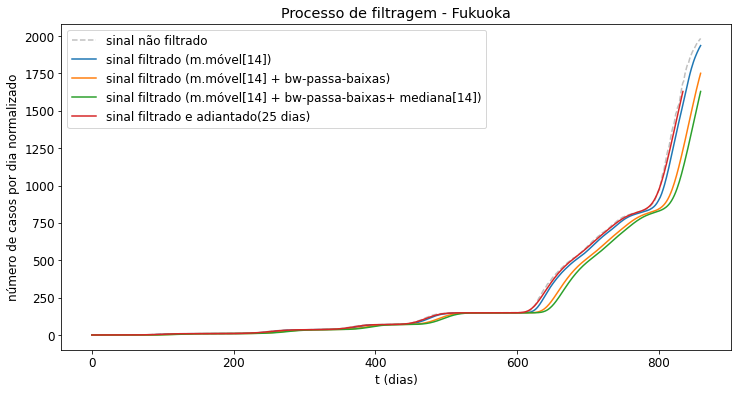

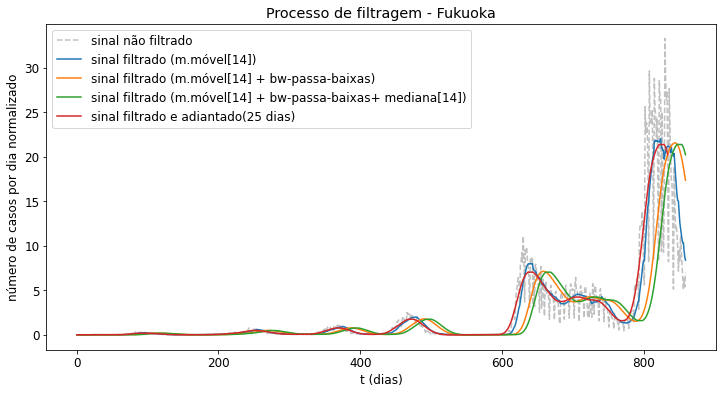

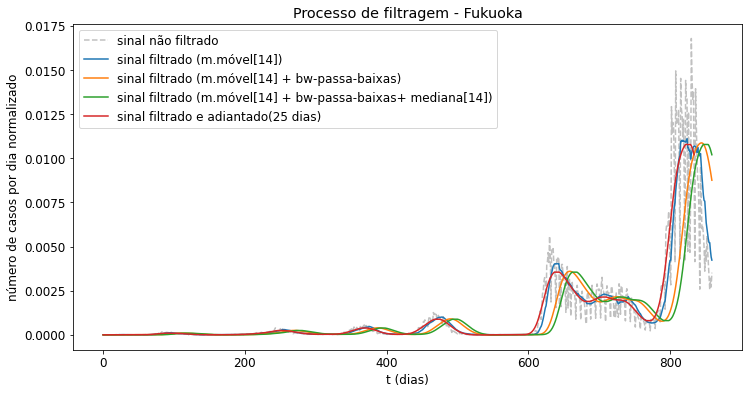

x_nw: [204, 328, 424, 595, 688]
Sigmoid #1 - A0:9.160628526080556 | tp0:93.26946544199765 | delta0:11.155131786244585 | nu0:1.0 
(optimal) Sigmoid #1 - A0:9.160628526080556 | tp0:93.26946544199765 | delta0:11.155131786244585 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:26.775101249123576 | tp0:248.29919875969713 | delta0:13.27946275118463 | nu0:1.0 
(optimal) Sigmoid #2 - A0:26.775101249123576 | tp0:248.29919875969713 | delta0:13.27946275118463 | nu0:1.0 
Sigmoid #3 - A0:33.717750260570625 | tp0:365.0782714137306 | delta0:9.304907365818782 | nu0:1.0 
(optimal) Sigmoid #3 - A0:33.717750260570625 | tp0:365.0782714137306 | delta0:9.304907365818782 | nu0:1.0 
Sigmoid #4 - A0:78.19517962896501 | tp0:468.0591999770525 | delta0:9.242639925464076 | nu0:1.0 
(optimal) Sigmoid #4 - A0:78.19517962896501 | tp0:468.0591999770525 | delta0:9.242639925464076 | nu0:1.0 
Sigmoid #5 - A0:374.82794635555445 | tp0:644.1433321195838 | delta0:11.31397495906043 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


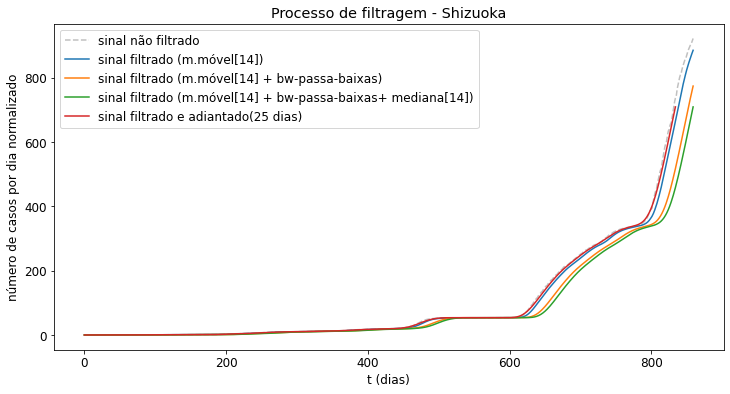

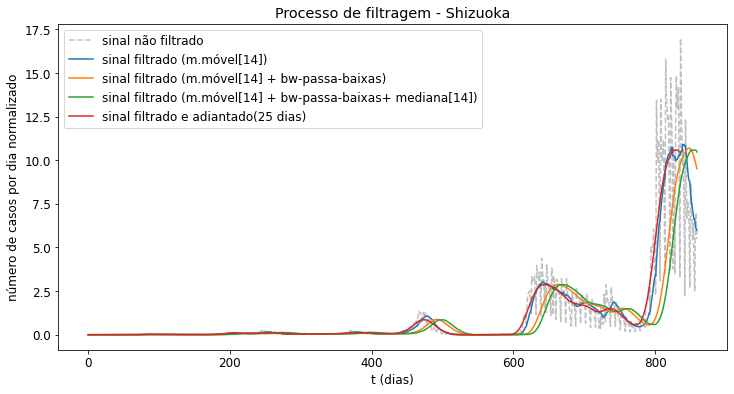

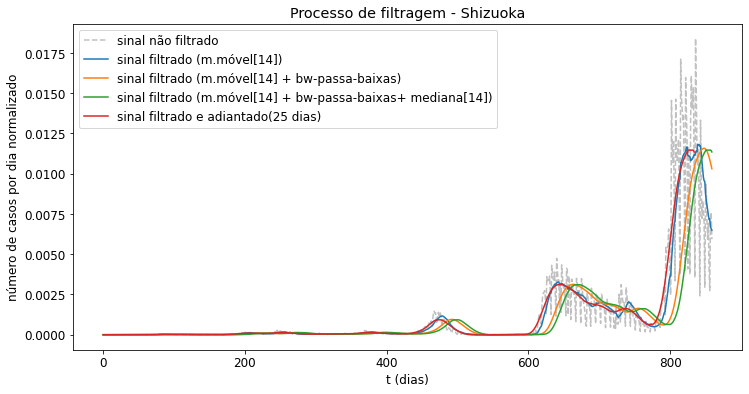

x_nw: [233, 352, 428, 595, 725]
Sigmoid #1 - A0:272.16843115915697 | tp0:414.3668009079614 | delta0:46.43038026803038 | nu0:1.0 
(optimal) Sigmoid #1 - A0:272.16843115915697 | tp0:414.3668009079614 | delta0:46.43038026803038 | nu0:1.0 
Sigmoid #2 - A0:269.0952171949645 | tp0:431.564601627387 | delta0:3.9213447538097554 | nu0:1.0 
(optimal) Sigmoid #2 - A0:269.0952171949645 | tp0:431.564601627387 | delta0:3.9213447538097554 | nu0:1.0 
Sigmoid #3 - A0:268.4947237670266 | tp0:466.45077872778825 | delta0:1.8420299254138883 | nu0:1.0 
(optimal) Sigmoid #3 - A0:268.4947237670266 | tp0:466.45077872778825 | delta0:1.8420299254138883 | nu0:1.0 
Sigmoid #4 - A0:-6.51368736725999e-10 | tp0:1107.9429662277882 | delta0:244.7307018004139 | nu0:1.0 
(optimal) Sigmoid #4 - A0:-6.51368736725999e-10 | tp0:1107.9429662277882 | delta0:244.7307018004139 | nu0:1.0 
Sigmoid #5 - A0:-6.51368736725999e-10 | tp0:1107.9429662277882 | delta0:244.7307018004139 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


In [14]:
rel_rmse_by_test = {}
rel_rmse_by_test['Interval'] = ['Wave 1', 'Waves 1 to 2', 'Waves 1 to 3', 'Waves 1 to 4', 'Waves 1 to 5']

# Most populous prefectures in Japan
japan_pref = ['Tokyo','Kanagawa','Osaka','Aichi','Saitama','Chiba','Hyōgo','Hokkaido','Fukuoka','Shizuoka']
#japan_pref = ['Saitama','Chiba']

filtered_data_by_pref = {}
filtered_daily_data_by_pref = {}

for city_name in japan_pref:
    # Import data
    data = pd.read_csv(f"../Datasets/{city_name.lower()}.csv") 
    indicator='cases'

    acc_data = data.cumulative_confirmed #(Japan)
    normalized_acc_data = acc_data / max(acc_data)

    t = np.linspace(0, len(acc_data)-1, len(acc_data))

    normalized_acc_data = normalized_acc_data.tolist()
    daily_data = data.new_confirmed

    scaling_factor = 500
    acc_data = acc_data / scaling_factor
    daily_data = list(daily_data/ scaling_factor)

    # =================================================================================================

    filtered_data_by_pref[city_name] = filter_data(acc_data)
    filtered_daily_data_by_pref[city_name] = filter_data(daily_data)

    # Transition Points
    x_nw = get_transition_points(acc_data, visual=False, city_name=city_name, threshold=2e-6, indicator = indicator)
    if( len(x_nw) > 5):
        x_nw = x_nw[1:6]

    print('x_nw:', x_nw)

    sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
                                daily_data, 
                                city_name, 
                                x_nw, 
                                indicator = indicator, 
                                n_weeks_pred = 0,
                                scaling_factor = scaling_factor,
                                visual = False
                                )

    rel_rmse_by_test[city_name] = rel_rmse_list

    

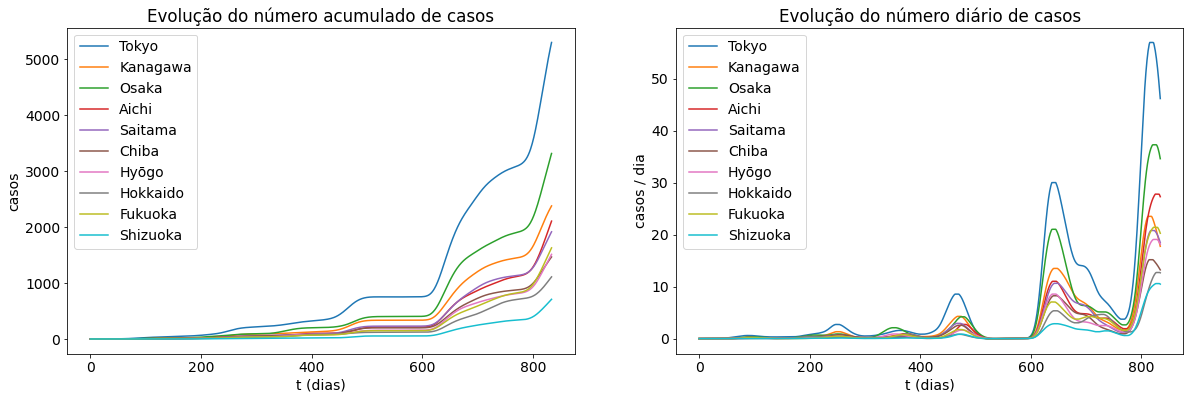

In [15]:
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1, 2, figsize=(20,6))
for key in filtered_data_by_pref.keys():
    axs[0].plot(filtered_data_by_pref[key], label=key)
    axs[0].set_title('Evolução do número acumulado de casos')
    axs[0].set_ylabel('casos')
    axs[0].set_xlabel('t (dias)')
    axs[0].legend()
    axs[1].plot(filtered_daily_data_by_pref[key], label=key)
    axs[1].set_title('Evolução do número diário de casos')
    axs[1].set_ylabel('casos / dia')
    axs[1].set_xlabel('t (dias)')
    axs[1].legend()    
plt.savefig('Figuras/TG_10_PREF_EVOLUCAO', facecolor="white", dpi=200)
plt.show()
plt.rcParams.update({'font.size': 12})

In [16]:
standard_filt = rel_rmse_by_test
pd.DataFrame(standard_filt)

Interval   Tokyo Kanagawa   Osaka    Aichi Saitama   Chiba     Hyōgo  \
0        Wave 1  1.814%   2.771%  1.712%   2.519%  2.407%  2.212%    4.492%   
1  Waves 1 to 2  0.923%   0.953%  0.514%  10.182%  1.018%  1.488%   11.016%   
2  Waves 1 to 3  0.548%   0.556%  0.331%  19.338%  0.612%  2.549%   68.187%   
3  Waves 1 to 4   0.23%   0.238%   0.16%  21.314%  0.223%  0.817%  658.893%   
4  Waves 1 to 5  0.883%   0.657%  0.182%   28.21%  0.643%  0.677%  167.175%   

  Hokkaido Fukuoka  Shizuoka  
0   2.086%  2.398%    5.164%  
1   0.932%   0.78%   83.058%  
2   0.565%  0.385%  219.798%  
3   0.321%  0.207%  662.851%  
4   0.217%  0.414%  149.312%

In [17]:
# ==== SÓ BUTTERWORTH PASSA BAIXAS ====

def filter_data(data):    

    plt.figure(figsize=(12, 6))
    plt.title(f"Filtering process - {city_name}")
    plt.xlabel("t (days)")
    plt.ylabel("cases / day")

    # Plotting unfiltered version
    plt.plot(data, label="unfiltered", c='silver', linestyle='dashed')

    # 2nd Order Low-Pass Filter with 14-day window
    order = 2
    fs = len(data) # sampling rate       
    cutoff = 14 # cutoff freq.
    filtered_data =  butterworth_lowpass_filter(data, cutoff, fs, order)
    plt.plot(filtered_data, label="filtered (bw-low-pass)")

    # Reduce the delay effect introduced by the filtering process
    # Advance the signal by 15 days
    n_days_shift = 15
    filtered_data = filtered_data[n_days_shift:]    
    plt.plot(filtered_data, label=f"shifted signal ({n_days_shift} days)")

    plt.legend()
    plt.show()

    return filtered_data

new_wave_filt.filter_data = filter_data


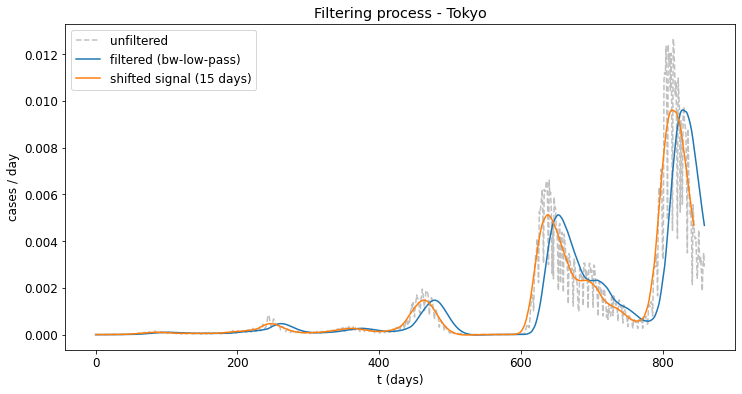

x_nw: [53, 174, 179, 201, 207]
Sigmoid #1 - A0:16.249434445274915 | tp0:84.09555737780579 | delta0:19.162016599718743 | nu0:1.0 
(optimal) Sigmoid #1 - A0:16.249434445274915 | tp0:84.09555737780579 | delta0:19.162016599718743 | nu0:1.0 
Sigmoid #2 - A0:34.46052318993492 | tp0:112.78879213166151 | delta0:22.123568358151427 | nu0:1.0 
(optimal) Sigmoid #2 - A0:34.46052318993492 | tp0:112.78879213166151 | delta0:22.123568358151427 | nu0:1.0 
Sigmoid #3 - A0:0.2929347580795574 | tp0:121.54024721673278 | delta0:27.574197152972754 | nu0:1.0 
(optimal) Sigmoid #3 - A0:0.2929347580795574 | tp0:121.54024721673278 | delta0:27.574197152972754 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #4 - A0:21.946795480376434 | tp0:194.93942918944603 | delta0:8.179159312947693 | nu0:1.0 
(optimal) Sigmoid #4 - A0:21.946795480376434 | tp0:194.93942918944603 | delta0:8.179159312947693 | nu0:1.0 
Sigmoid #5 - A0:1.6653345369377348e-16 | tp0:217.1633265098112 | delta0:7.222298507285936 | nu0:1.0 


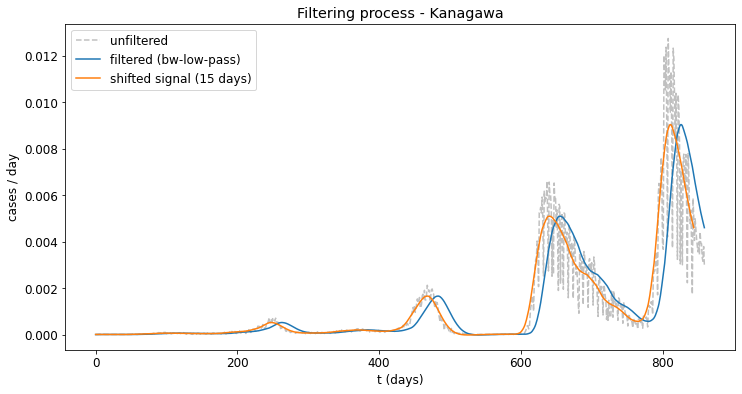

x_nw: [175, 178, 202, 206, 327]
Sigmoid #1 - A0:15.3092975301104 | tp0:115.60954865485458 | delta0:22.84358672172641 | nu0:1.0 
(optimal) Sigmoid #1 - A0:15.3092975301104 | tp0:115.60954865485458 | delta0:22.84358672172641 | nu0:1.0 
Sigmoid #2 - A0:0.04186759879809864 | tp0:117.44370093359193 | delta0:23.963828492091576 | nu0:1.0 
(optimal) Sigmoid #2 - A0:0.04186759879809864 | tp0:117.44370093359193 | delta0:23.963828492091576 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #3 - A0:40.5468201487422 | tp0:218.9649573755437 | delta0:10.43671782709036 | nu0:1.0 
(optimal) Sigmoid #3 - A0:40.5468201487422 | tp0:218.9649573755437 | delta0:10.43671782709036 | nu0:1.0 
Sigmoid #4 - A0:39.357573383877835 | tp0:223.36431424819077 | delta0:1.3575155501078693 | nu0:1.0 
(optimal) Sigmoid #4 - A0:39.357573383877835 | tp0:223.36431424819077 | delta0:1.3575155501078693 | nu0:1.0 
Sigmoid #5 - A0:-1.574296248918472e-13 | tp0:235.64505025604583 | delta0:11.330241411850894 | nu0:1.0 


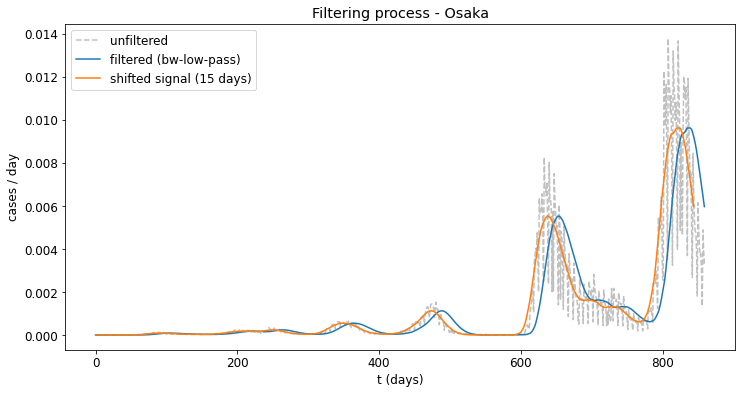

x_nw: [171, 230, 305, 416, 592]
Sigmoid #1 - A0:19.20972729900583 | tp0:99.56140716041266 | delta0:14.530072114851542 | nu0:1.0 
(optimal) Sigmoid #1 - A0:19.20972729900583 | tp0:99.56140716041266 | delta0:14.530072114851542 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:36.64542326777022 | tp0:206.73159865793846 | delta0:11.772813128059596 | nu0:1.0 
(optimal) Sigmoid #2 - A0:36.64542326777022 | tp0:206.73159865793846 | delta0:11.772813128059596 | nu0:1.0 
Sigmoid #3 - A0:25.06075193972327 | tp0:255.14368508922684 | delta0:7.1673953921363305 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


(optimal) Sigmoid #3 - A0:25.06075193972327 | tp0:255.14368508922684 | delta0:7.1673953921363305 | nu0:1.0 
Sigmoid #4 - A0:109.39696715906763 | tp0:350.93284427948765 | delta0:11.329501092742323 | nu0:1.0 
(optimal) Sigmoid #4 - A0:109.39696715906763 | tp0:350.93284427948765 | delta0:11.329501092742323 | nu0:1.0 
Sigmoid #5 - A0:198.8649608555784 | tp0:471.8630698788997 | delta0:10.491555139522452 | nu0:1.0 


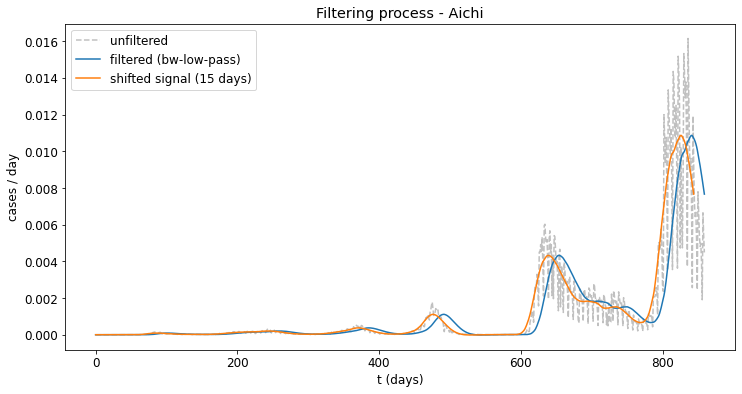

x_nw: [168, 229, 315, 430, 594]
Sigmoid #1 - A0:9.813223025645259 | tp0:93.2936597209767 | delta0:10.089901977100443 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #1 - A0:9.813223025645259 | tp0:93.2936597209767 | delta0:10.089901977100443 | nu0:1.0 
Sigmoid #2 - A0:22.284825572638503 | tp0:209.68750098476335 | delta0:13.274593136007766 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #2 - A0:22.284825572638503 | tp0:209.68750098476335 | delta0:13.274593136007766 | nu0:1.0 
Sigmoid #3 - A0:8.948044789778981 | tp0:250.23888327289382 | delta0:6.636556909543451 | nu0:1.0 
(optimal) Sigmoid #3 - A0:8.948044789778981 | tp0:250.23888327289382 | delta0:6.636556909543451 | nu0:1.0 
Sigmoid #4 - A0:49.59602753760054 | tp0:368.832360003687 | delta0:12.420175442008016 | nu0:1.0 
(optimal) Sigmoid #4 - A0:49.59602753760054 | tp0:368.832360003687 | delta0:12.420175442008016 | nu0:1.0 
Sigmoid #5 - A0:109.97777674377281 | tp0:476.03856702755536 | delta0:8.063131897164713 | nu0:1.0 


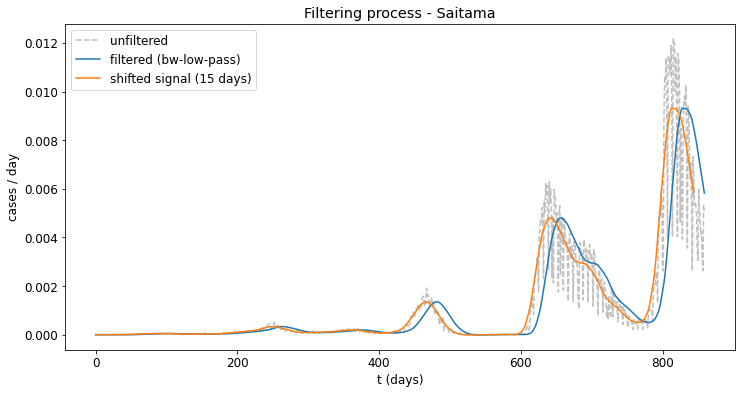

x_nw: [194, 332, 349, 412, 593]
Sigmoid #1 - A0:11.283795150833482 | tp0:116.79687830923999 | delta0:28.467608533667235 | nu0:1.0 
(optimal) Sigmoid #1 - A0:11.283795150833482 | tp0:116.79687830923999 | delta0:28.467608533667235 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


Sigmoid #2 - A0:49.439448605017816 | tp0:250.9061947634531 | delta0:18.062627453040005 | nu0:1.0 
(optimal) Sigmoid #2 - A0:49.439448605017816 | tp0:250.9061947634531 | delta0:18.062627453040005 | nu0:1.0 
Sigmoid #3 - A0:84.54736626192354 | tp0:373.04047138056916 | delta0:10.993749760417439 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


(optimal) Sigmoid #3 - A0:84.54736626192354 | tp0:373.04047138056916 | delta0:10.993749760417439 | nu0:1.0 
Sigmoid #4 - A0:13.340794373969782 | tp0:469.60118416893613 | delta0:3.687479910135283 | nu0:1.0 
(optimal) Sigmoid #4 - A0:13.340794373969782 | tp0:469.60118416893613 | delta0:3.687479910135283 | nu0:1.0 
Sigmoid #5 - A0:70.40346583501159 | tp0:473.5704883371448 | delta0:5.544074639582593 | nu0:1.0 


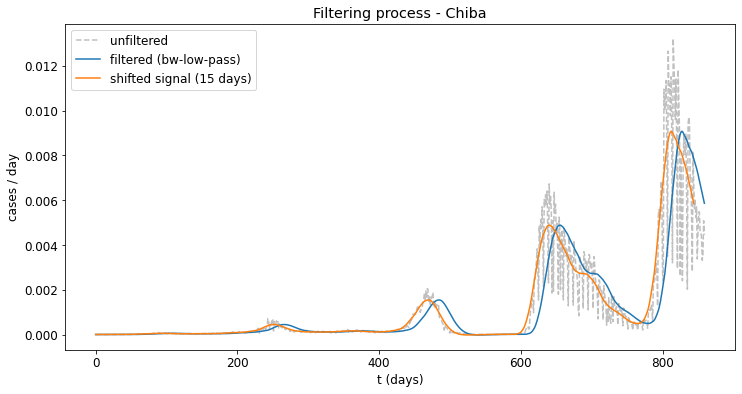

x_nw: [189, 207, 336, 341, 410]
Sigmoid #1 - A0:9.31894517809791 | tp0:122.48044251554965 | delta0:26.23300402247762 | nu0:1.0 
(optimal) Sigmoid #1 - A0:9.31894517809791 | tp0:122.48044251554965 | delta0:26.23300402247762 | nu0:1.0 
Sigmoid #2 - A0:0.5220348725459308 | tp0:122.99647846917915 | delta0:26.592167115314517 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: invalid value encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #2 - A0:0.5220348725459308 | tp0:122.99647846917915 | delta0:26.592167115314517 | nu0:1.0 
Sigmoid #3 - A0:39.84455117980939 | tp0:258.27793042027247 | delta0:13.73776293761707 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


(optimal) Sigmoid #3 - A0:39.84455117980939 | tp0:258.27793042027247 | delta0:13.73776293761707 | nu0:1.0 
Sigmoid #4 - A0:0.23642305532388044 | tp0:267.0710276030683 | delta0:21.939168207798332 | nu0:1.0 
(optimal) Sigmoid #4 - A0:0.23642305532388044 | tp0:267.0710276030683 | delta0:21.939168207798332 | nu0:1.0 
Sigmoid #5 - A0:18.15343617113276 | tp0:365.7881818594431 | delta0:14.359975003432222 | nu0:1.0 


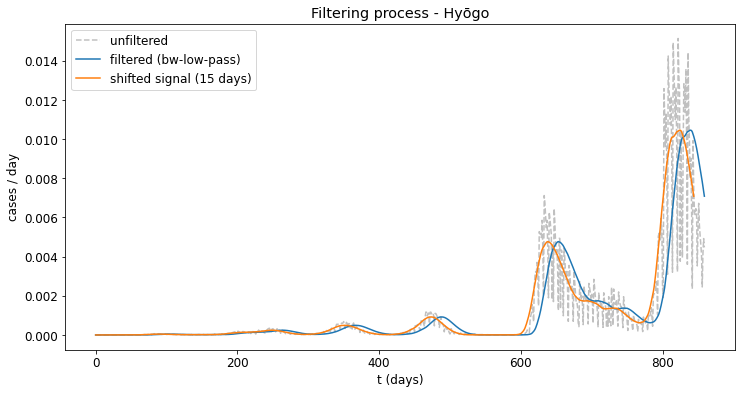

x_nw: [221, 229, 305, 418, 593]
Sigmoid #1 - A0:696.1281227972937 | tp0:453.6794470003836 | delta0:58.67064222584109 | nu0:1.0 
(optimal) Sigmoid #1 - A0:696.1281227972937 | tp0:453.6794470003836 | delta0:58.67064222584109 | nu0:1.0 
Sigmoid #2 - A0:695.6972268594362 | tp0:459.23402450046166 | delta0:32.039670307355564 | nu0:1.0 
(optimal) Sigmoid #2 - A0:695.6972268594362 | tp0:459.23402450046166 | delta0:32.039670307355564 | nu0:1.0 
Sigmoid #3 - A0:695.5116042805846 | tp0:463.5834687064604 | delta0:7.838650058848896 | nu0:1.0 
(optimal) Sigmoid #3 - A0:695.5116042805846 | tp0:463.5834687064604 | delta0:7.838650058848896 | nu0:1.0 
Sigmoid #4 - A0:695.4834060383971 | tp0:466.0794403861479 | delta0:0.001000000000030532 | nu0:1.0 
(optimal) Sigmoid #4 - A0:695.4834060383971 | tp0:466.0794403861479 | delta0:0.001000000000030532 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:19: RuntimeWarning: overflow encountered in exp
  g = lambda x: np.exp(-1*(t - tp)/delta)
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in deriv_f_t (vectorized)
  outputs = ufunc(*inputs)


Sigmoid #5 - A0:-2.773277208301901e-09 | tp0:466.0794403861479 | delta0:0.001000000000030532 | nu0:1.0 


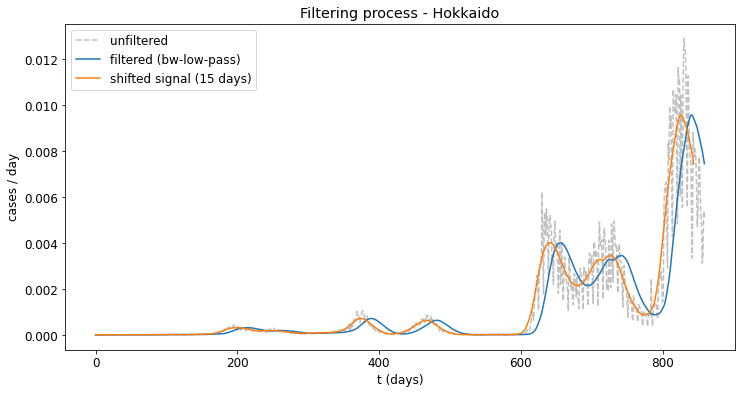

x_nw: [237, 332, 421, 593, 683]
Sigmoid #1 - A0:33.91182085740017 | tp0:210.0815223119781 | delta0:21.993073076839806 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #1 - A0:33.91182085740017 | tp0:210.0815223119781 | delta0:21.993073076839806 | nu0:1.0 
Sigmoid #2 - A0:14.576830756176868 | tp0:264.62854780905525 | delta0:14.31669995089438 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


(optimal) Sigmoid #2 - A0:14.576830756176868 | tp0:264.62854780905525 | delta0:14.31669995089438 | nu0:1.0 
Sigmoid #3 - A0:41.71424537485416 | tp0:373.1928542702754 | delta0:9.955655594551688 | nu0:1.0 
(optimal) Sigmoid #3 - A0:41.71424537485416 | tp0:373.1928542702754 | delta0:9.955655594551688 | nu0:1.0 
Sigmoid #4 - A0:39.25234859572762 | tp0:465.68839178776483 | delta0:10.563789775538208 | nu0:1.0 
(optimal) Sigmoid #4 - A0:39.25234859572762 | tp0:465.68839178776483 | delta0:10.563789775538208 | nu0:1.0 
Sigmoid #5 - A0:267.35156735512203 | tp0:645.1537579393182 | delta0:10.375110281033331 | nu0:1.0 


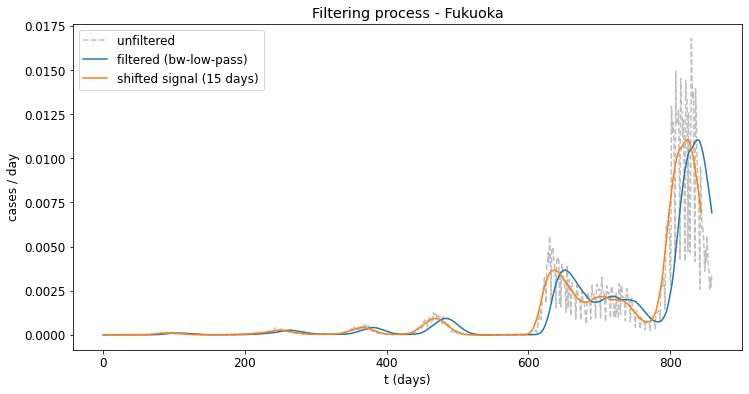

x_nw: [201, 326, 422, 594, 683]
Sigmoid #1 - A0:9.11561124422068 | tp0:93.0921191840642 | delta0:11.001543998116404 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))


(optimal) Sigmoid #1 - A0:9.11561124422068 | tp0:93.0921191840642 | delta0:11.001543998116404 | nu0:1.0 
Sigmoid #2 - A0:26.796677835780898 | tp0:248.15950150637855 | delta0:13.310024121450793 | nu0:1.0 
(optimal) Sigmoid #2 - A0:26.796677835780898 | tp0:248.15950150637855 | delta0:13.310024121450793 | nu0:1.0 
Sigmoid #3 - A0:33.80127374048459 | tp0:364.99166552418126 | delta0:9.357027467126375 | nu0:1.0 
(optimal) Sigmoid #3 - A0:33.80127374048459 | tp0:364.99166552418126 | delta0:9.357027467126375 | nu0:1.0 
Sigmoid #4 - A0:78.26771741189226 | tp0:468.0331595174854 | delta0:9.261171882085321 | nu0:1.0 
(optimal) Sigmoid #4 - A0:78.26771741189226 | tp0:468.0331595174854 | delta0:9.261171882085321 | nu0:1.0 
Sigmoid #5 - A0:361.0781422861629 | tp0:642.9348860038501 | delta0:10.678576650805882 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in double_scalars
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))


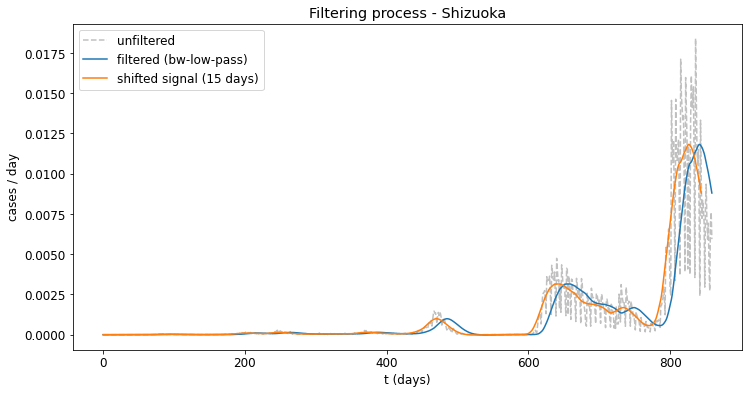

x_nw: [230, 351, 426, 594, 640]
Sigmoid #1 - A0:332.4025341296133 | tp0:421.1255387866773 | delta0:45.916588207303626 | nu0:1.0 
(optimal) Sigmoid #1 - A0:332.4025341296133 | tp0:421.1255387866773 | delta0:45.916588207303626 | nu0:1.0 
Sigmoid #2 - A0:329.7903420909722 | tp0:438.45687032019447 | delta0:4.194158018406075 | nu0:1.0 
(optimal) Sigmoid #2 - A0:329.7903420909722 | tp0:438.45687032019447 | delta0:4.194158018406075 | nu0:1.0 
Sigmoid #3 - A0:329.6485116466363 | tp0:449.35295796667884 | delta0:0.0009999999963774542 | nu0:1.0 
(optimal) Sigmoid #3 - A0:329.6485116466363 | tp0:449.35295796667884 | delta0:0.0009999999963774542 | nu0:1.0 
Sigmoid #4 - A0:-7.442338301189011e-09 | tp0:449.35295796667884 | delta0:0.001 | nu0:1.0 


/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:10: RuntimeWarning: overflow encountered in exp
  return A / ((1 + nu * np.exp(-1*(t - tp)/(delta)))**(1/nu))
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:19: RuntimeWarning: overflow encountered in exp
  g = lambda x: np.exp(-1*(t - tp)/delta)
/home/fpelogia/Documentos/HMP/Implementações/Python/TG_rascunho/epid_model.py:20: RuntimeWarning: invalid value encountered in double_scalars
  return (A * g(t))/(delta * (1 + nu*g(t))**((nu+1)/nu))
/home/fpelogia/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2411: RuntimeWarning: invalid value encountered in deriv_f_t (vectorized)
  outputs = ufunc(*inputs)


(optimal) Sigmoid #4 - A0:-7.442338301189011e-09 | tp0:449.35295796667884 | delta0:0.001 | nu0:1.0 
Sigmoid #5 - A0:-7.460970643564533e-09 | tp0:449.35295796667884 | delta0:0.001 | nu0:1.0 


In [18]:
rel_rmse_by_test = {}
rel_rmse_by_test['Interval'] = ['Wave 1', 'Waves 1 to 2', 'Waves 1 to 3', 'Waves 1 to 4', 'Waves 1 to 5']

# Most populous prefectures in Japan
japan_pref = ['Tokyo','Kanagawa','Osaka','Aichi','Saitama','Chiba','Hyōgo','Hokkaido','Fukuoka','Shizuoka']
#japan_pref = ['Saitama','Chiba']

for city_name in japan_pref:
    # Import data
    data = pd.read_csv(f"../Datasets/{city_name.lower()}.csv") 
    indicator='cases'

    acc_data = data.cumulative_confirmed #(Japan)
    normalized_acc_data = acc_data / max(acc_data)
    
    t = np.linspace(0, len(acc_data)-1, len(acc_data))

    normalized_acc_data = normalized_acc_data.tolist()
    daily_data = data.new_confirmed

    scaling_factor = 500
    acc_data = acc_data / scaling_factor
    daily_data = list(daily_data/ scaling_factor)

    # =================================================================================================

    # Transition Points
    x_nw = get_transition_points(acc_data, visual=False, city_name=city_name, threshold=2e-6, indicator = indicator)
    if( len(x_nw) > 5):
        x_nw = x_nw[1:6]

    print('x_nw:', x_nw)

    sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
                                daily_data, 
                                city_name, 
                                x_nw, 
                                indicator = indicator, 
                                n_weeks_pred = 0,
                                scaling_factor = scaling_factor,
                                visual = False
                                )

    rel_rmse_by_test[city_name] = rel_rmse_list

    

In [19]:
bw_filt = rel_rmse_by_test
pd.DataFrame(bw_filt)

Interval   Tokyo Kanagawa   Osaka   Aichi Saitama   Chiba     Hyōgo  \
0        Wave 1  1.292%   1.474%  1.712%  2.398%  3.103%  2.238%    5.019%   
1  Waves 1 to 2  1.785%   1.517%  0.533%  0.697%   1.02%  1.477%    4.397%   
2  Waves 1 to 3  1.886%   1.055%  0.318%  0.363%  0.851%  1.024%   10.542%   
3  Waves 1 to 4  1.238%   1.173%  0.156%  0.289%  5.739%  1.123%   89.409%   
4  Waves 1 to 5  1.133%  16.193%  0.181%   0.22%  3.684%  0.673%  703.897%   

  Hokkaido Fukuoka  Shizuoka  
0   2.623%  2.231%    5.344%  
1   1.598%  0.751%   88.253%  
2   0.731%   0.37%  231.812%  
3   0.456%  0.202%  837.529%  
4    0.26%  0.372%  433.269%

In [20]:
pd.DataFrame(standard_filt)

Interval   Tokyo Kanagawa   Osaka    Aichi Saitama   Chiba     Hyōgo  \
0        Wave 1  1.814%   2.771%  1.712%   2.519%  2.407%  2.212%    4.492%   
1  Waves 1 to 2  0.923%   0.953%  0.514%  10.182%  1.018%  1.488%   11.016%   
2  Waves 1 to 3  0.548%   0.556%  0.331%  19.338%  0.612%  2.549%   68.187%   
3  Waves 1 to 4   0.23%   0.238%   0.16%  21.314%  0.223%  0.817%  658.893%   
4  Waves 1 to 5  0.883%   0.657%  0.182%   28.21%  0.643%  0.677%  167.175%   

  Hokkaido Fukuoka  Shizuoka  
0   2.086%  2.398%    5.164%  
1   0.932%   0.78%   83.058%  
2   0.565%  0.385%  219.798%  
3   0.321%  0.207%  662.851%  
4   0.217%  0.414%  149.312%

In [21]:
pd.DataFrame(bw_filt)

Interval   Tokyo Kanagawa   Osaka   Aichi Saitama   Chiba     Hyōgo  \
0        Wave 1  1.292%   1.474%  1.712%  2.398%  3.103%  2.238%    5.019%   
1  Waves 1 to 2  1.785%   1.517%  0.533%  0.697%   1.02%  1.477%    4.397%   
2  Waves 1 to 3  1.886%   1.055%  0.318%  0.363%  0.851%  1.024%   10.542%   
3  Waves 1 to 4  1.238%   1.173%  0.156%  0.289%  5.739%  1.123%   89.409%   
4  Waves 1 to 5  1.133%  16.193%  0.181%   0.22%  3.684%  0.673%  703.897%   

  Hokkaido Fukuoka  Shizuoka  
0   2.623%  2.231%    5.344%  
1   1.598%  0.751%   88.253%  
2   0.731%   0.37%  231.812%  
3   0.456%  0.202%  837.529%  
4    0.26%  0.372%  433.269%

In [22]:
bw_filt['Interval']

['Wave 1', 'Waves 1 to 2', 'Waves 1 to 3', 'Waves 1 to 4', 'Waves 1 to 5']

In [23]:
percent_fmt = np.vectorize(lambda x: float(x[:-1])/100)

In [24]:
print(standard_filt['Chiba'])
percent_fmt(standard_filt['Chiba'])

['2.212%', '1.488%', '2.549%', '0.817%', '0.677%']


array([0.02212, 0.01488, 0.02549, 0.00817, 0.00677])

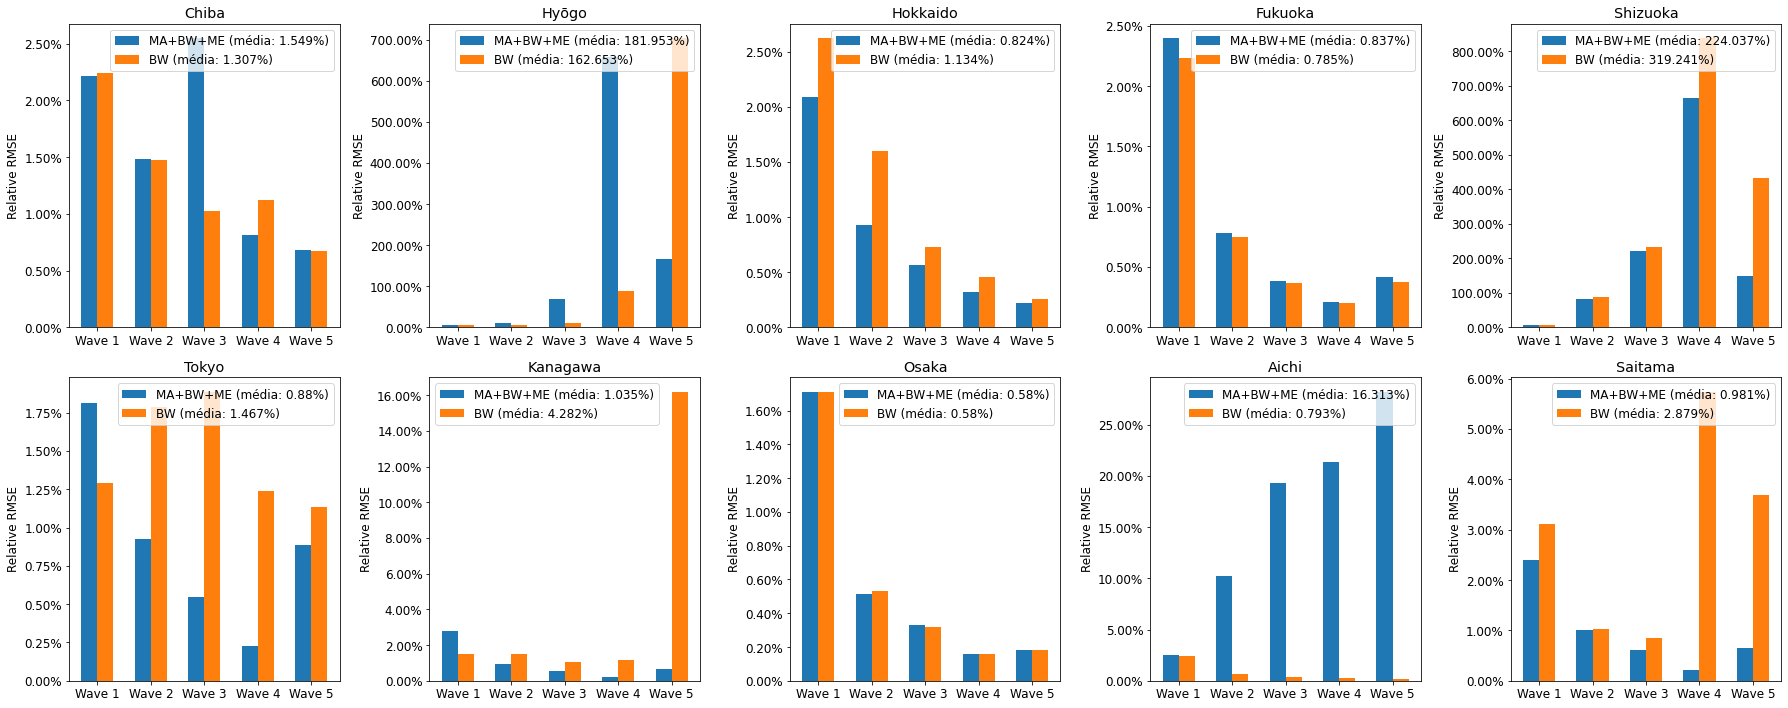

In [25]:
fig, axs = plt.subplots(2, 5, figsize=(25,10))
for i in range(len(japan_pref)):
    row =  1 if (i < 5) else 0

    labels = ['Wave 1', 'Wave 2', 'Wave 3', 'Wave 4', 'Wave 5']
    x = np.arange(len(labels))
    width = 0.30  # the width of the bars
    
    standard = percent_fmt(standard_filt[japan_pref[i]])
    bw_only = percent_fmt(bw_filt[japan_pref[i]])

    axs[row][i%5].set_title(japan_pref[i])
    axs[row][i%5].bar(x - width/2, standard, width, label=f'MA+BW+ME (média: {str(round(standard.mean()*100, 3)) + "%"})')
    axs[row][i%5].bar(x + width/2, bw_only, width, label=f'BW (média: {str(round(bw_only.mean()*100, 3)) + "%"})')
    axs[row][i%5].set_ylabel('Relative RMSE')
    axs[row][i%5].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
    axs[row][i%5].legend()
    axs[row][i%5].set_xticks(x)
    axs[row][i%5].set_xticklabels(labels)
plt.tight_layout()
plt.savefig('Figuras/10-pref-filter-test.png', dpi=200, facecolor='white')
plt.show()

## Anotações

Filtragem padrão foi melhor em: **Tokyo, Kanagawa, Saitama, Hokkaido, Shizuoka**


Filtragem só com butterworth foi melhor em: **Osaka, Aichi, Chiba, Hyōgo, Fukuoka**


### MA + BW

In [ ]:
def filter_data(data):    

    plt.figure(figsize=(12, 6))
    plt.title(f"Processo de filtragem - {city_name}")
    plt.xlabel("t (dias)")
    plt.ylabel("número de casos por dia normalizado")

    # Plotting unfiltered version
    plt.plot(data, label="sinal não filtrado", c='silver', linestyle='dashed')

    # Moving average with 14-day window
    filtered_data = moving_average(data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14])")
    
    # 2nd Order Low-Pass Filter with 14-day window
    order = 2
    fs = len(data) # sampling rate       
    cutoff = 14 # cutoff freq.
    filtered_data =  butterworth_lowpass_filter(filtered_data, cutoff, fs, order)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas)")
    
    # Reduce the delay effect introduced by the filtering process
    # Advance the signal by 25 days
    n_days_shift = 20
    filtered_data = filtered_data[n_days_shift:]    
    plt.plot(filtered_data, label=f"sinal filtrado e adiantado({n_days_shift} dias)")

    plt.legend()

    plt.show()

    return filtered_data

new_wave_filt.filter_data = filter_data

In [ ]:
rel_rmse_by_test = {}
rel_rmse_by_test['Interval'] = ['Wave 1', 'Waves 1 to 2', 'Waves 1 to 3', 'Waves 1 to 4', 'Waves 1 to 5']

# Most populous prefectures in Japan
japan_pref = ['Tokyo','Kanagawa','Osaka','Aichi','Saitama','Chiba','Hyōgo','Hokkaido','Fukuoka','Shizuoka']
#japan_pref = ['Saitama','Chiba']

filtered_data_by_pref = {}
filtered_daily_data_by_pref = {}

for city_name in japan_pref:
    # Import data
    data = pd.read_csv(f"../Datasets/{city_name.lower()}.csv") 
    indicator='cases'

    acc_data = data.cumulative_confirmed #(Japan)
    normalized_acc_data = acc_data / max(acc_data)

    t = np.linspace(0, len(acc_data)-1, len(acc_data))

    normalized_acc_data = normalized_acc_data.tolist()
    daily_data = data.new_confirmed

    scaling_factor = 500
    acc_data = acc_data / scaling_factor
    daily_data = list(daily_data/ scaling_factor)

    # =================================================================================================

    filtered_data_by_pref[city_name] = filter_data(acc_data)
    filtered_daily_data_by_pref[city_name] = filter_data(daily_data)

    # Transition Points
    x_nw = get_transition_points(acc_data, visual=False, city_name=city_name, threshold=2e-6, indicator = indicator)
    if( len(x_nw) > 5):
        x_nw = x_nw[1:6]

    print('x_nw:', x_nw)

    sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
                                daily_data, 
                                city_name, 
                                x_nw, 
                                indicator = indicator, 
                                n_weeks_pred = 0,
                                scaling_factor = scaling_factor,
                                visual = False
                                )

    rel_rmse_by_test[city_name] = rel_rmse_list

    

In [ ]:
ma_bw = rel_rmse_by_test
pd.DataFrame(ma_bw)

### BW + ME

In [ ]:
def filter_data(data):    

    plt.figure(figsize=(12, 6))
    plt.title(f"Processo de filtragem - {city_name}")
    plt.xlabel("t (dias)")
    plt.ylabel("número de casos por dia normalizado")

    # Plotting unfiltered version
    plt.plot(data, label="sinal não filtrado", c='silver', linestyle='dashed')

    # 2nd Order Low-Pass Filter with 14-day window
    order = 2
    fs = len(data) # sampling rate       
    cutoff = 14 # cutoff freq.
    filtered_data =  butterworth_lowpass_filter(data, cutoff, fs, order)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas)")

    # Median filter with 14-day window
    filtered_data = median_filter(filtered_data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas+ mediana[14])")

    # Reduce the delay effect introduced by the filtering process
    # Advance the signal by 25 days
    n_days_shift = 20
    filtered_data = filtered_data[n_days_shift:]    
    plt.plot(filtered_data, label=f"sinal filtrado e adiantado({n_days_shift} dias)")

    plt.legend()

    plt.show()

    return filtered_data

new_wave_filt.filter_data = filter_data

In [ ]:
rel_rmse_by_test = {}
rel_rmse_by_test['Interval'] = ['Wave 1', 'Waves 1 to 2', 'Waves 1 to 3', 'Waves 1 to 4', 'Waves 1 to 5']

# Most populous prefectures in Japan
japan_pref = ['Tokyo','Kanagawa','Osaka','Aichi','Saitama','Chiba','Hyōgo','Hokkaido','Fukuoka','Shizuoka']
#japan_pref = ['Saitama','Chiba']

filtered_data_by_pref = {}
filtered_daily_data_by_pref = {}

for city_name in japan_pref:
    # Import data
    data = pd.read_csv(f"../Datasets/{city_name.lower()}.csv") 
    indicator='cases'

    acc_data = data.cumulative_confirmed #(Japan)
    normalized_acc_data = acc_data / max(acc_data)

    t = np.linspace(0, len(acc_data)-1, len(acc_data))

    normalized_acc_data = normalized_acc_data.tolist()
    daily_data = data.new_confirmed

    scaling_factor = 500
    acc_data = acc_data / scaling_factor
    daily_data = list(daily_data/ scaling_factor)

    # =================================================================================================

    filtered_data_by_pref[city_name] = filter_data(acc_data)
    filtered_daily_data_by_pref[city_name] = filter_data(daily_data)

    # Transition Points
    x_nw = get_transition_points(acc_data, visual=False, city_name=city_name, threshold=2e-6, indicator = indicator)
    if( len(x_nw) > 5):
        x_nw = x_nw[1:6]

    print('x_nw:', x_nw)

    sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
                                daily_data, 
                                city_name, 
                                x_nw, 
                                indicator = indicator, 
                                n_weeks_pred = 0,
                                scaling_factor = scaling_factor,
                                visual = False
                                )

    rel_rmse_by_test[city_name] = rel_rmse_list

    

In [ ]:
bw_me = rel_rmse_by_test
pd.DataFrame(bw_me)

### BW + MA + ME

In [ ]:
def filter_data(data):    

    plt.figure(figsize=(12, 6))
    plt.title(f"Processo de filtragem - {city_name}")
    plt.xlabel("t (dias)")
    plt.ylabel("número de casos por dia normalizado")

    # Plotting unfiltered version
    plt.plot(data, label="sinal não filtrado", c='silver', linestyle='dashed')

    # 2nd Order Low-Pass Filter with 14-day window
    order = 2
    fs = len(data) # sampling rate       
    cutoff = 14 # cutoff freq.
    filtered_data =  butterworth_lowpass_filter(data, cutoff, fs, order)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas)")

    # Moving average with 14-day window
    filtered_data = moving_average(filtered_data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14])")

    # Median filter with 14-day window
    filtered_data = median_filter(filtered_data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas+ mediana[14])")

    # Reduce the delay effect introduced by the filtering process
    # Advance the signal by 25 days
    n_days_shift = 25
    filtered_data = filtered_data[n_days_shift:]    
    plt.plot(filtered_data, label=f"sinal filtrado e adiantado({n_days_shift} dias)")

    plt.legend()

    plt.show()

    return filtered_data

new_wave_filt.filter_data = filter_data

In [ ]:
rel_rmse_by_test = {}
rel_rmse_by_test['Interval'] = ['Wave 1', 'Waves 1 to 2', 'Waves 1 to 3', 'Waves 1 to 4', 'Waves 1 to 5']

# Most populous prefectures in Japan
japan_pref = ['Tokyo','Kanagawa','Osaka','Aichi','Saitama','Chiba','Hyōgo','Hokkaido','Fukuoka','Shizuoka']
#japan_pref = ['Saitama','Chiba']

filtered_data_by_pref = {}
filtered_daily_data_by_pref = {}

for city_name in japan_pref:
    # Import data
    data = pd.read_csv(f"../Datasets/{city_name.lower()}.csv") 
    indicator='cases'

    acc_data = data.cumulative_confirmed #(Japan)
    normalized_acc_data = acc_data / max(acc_data)

    t = np.linspace(0, len(acc_data)-1, len(acc_data))

    normalized_acc_data = normalized_acc_data.tolist()
    daily_data = data.new_confirmed

    scaling_factor = 500
    acc_data = acc_data / scaling_factor
    daily_data = list(daily_data/ scaling_factor)

    # =================================================================================================

    filtered_data_by_pref[city_name] = filter_data(acc_data)
    filtered_daily_data_by_pref[city_name] = filter_data(daily_data)

    # Transition Points
    x_nw = get_transition_points(acc_data, visual=False, city_name=city_name, threshold=2e-6, indicator = indicator)
    if( len(x_nw) > 5):
        x_nw = x_nw[1:6]

    print('x_nw:', x_nw)

    sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
                                daily_data, 
                                city_name, 
                                x_nw, 
                                indicator = indicator, 
                                n_weeks_pred = 0,
                                scaling_factor = scaling_factor,
                                visual = False
                                )

    rel_rmse_by_test[city_name] = rel_rmse_list

    

In [ ]:
bw_ma_me = rel_rmse_by_test
pd.DataFrame(bw_ma_me)

### MA+ME+BW

In [ ]:
def filter_data(data):    

    plt.figure(figsize=(12, 6))
    plt.title(f"Processo de filtragem - {city_name}")
    plt.xlabel("t (dias)")
    plt.ylabel("número de casos por dia normalizado")

    # Plotting unfiltered version
    plt.plot(data, label="sinal não filtrado", c='silver', linestyle='dashed')

    # Moving average with 14-day window
    filtered_data = moving_average(data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14])")

    # Median filter with 14-day window
    filtered_data = median_filter(filtered_data, 14)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas+ mediana[14])")

    # 2nd Order Low-Pass Filter with 14-day window
    order = 2
    fs = len(data) # sampling rate       
    cutoff = 14 # cutoff freq.
    filtered_data =  butterworth_lowpass_filter(filtered_data, cutoff, fs, order)
    plt.plot(filtered_data, label="sinal filtrado (m.móvel[14] + bw-passa-baixas)")

    # Reduce the delay effect introduced by the filtering process
    # Advance the signal by 25 days
    n_days_shift = 25
    filtered_data = filtered_data[n_days_shift:]    
    plt.plot(filtered_data, label=f"sinal filtrado e adiantado({n_days_shift} dias)")

    plt.legend()

    plt.show()

    return filtered_data

new_wave_filt.filter_data = filter_data

In [ ]:
rel_rmse_by_test = {}
rel_rmse_by_test['Interval'] = ['Wave 1', 'Waves 1 to 2', 'Waves 1 to 3', 'Waves 1 to 4', 'Waves 1 to 5']

# Most populous prefectures in Japan
japan_pref = ['Tokyo','Kanagawa','Osaka','Aichi','Saitama','Chiba','Hyōgo','Hokkaido','Fukuoka','Shizuoka']
#japan_pref = ['Saitama','Chiba']

filtered_data_by_pref = {}
filtered_daily_data_by_pref = {}

for city_name in japan_pref:
    # Import data
    data = pd.read_csv(f"../Datasets/{city_name.lower()}.csv") 
    indicator='cases'

    acc_data = data.cumulative_confirmed #(Japan)
    normalized_acc_data = acc_data / max(acc_data)

    t = np.linspace(0, len(acc_data)-1, len(acc_data))

    normalized_acc_data = normalized_acc_data.tolist()
    daily_data = data.new_confirmed

    scaling_factor = 500
    acc_data = acc_data / scaling_factor
    daily_data = list(daily_data/ scaling_factor)

    # =================================================================================================

    filtered_data_by_pref[city_name] = filter_data(acc_data)
    filtered_daily_data_by_pref[city_name] = filter_data(daily_data)

    # Transition Points
    x_nw = get_transition_points(acc_data, visual=False, city_name=city_name, threshold=2e-6, indicator = indicator)
    if( len(x_nw) > 5):
        x_nw = x_nw[1:6]

    print('x_nw:', x_nw)

    sig_params, rel_rmse_list = optimize_tg.fit_data(acc_data, 
                                daily_data, 
                                city_name, 
                                x_nw, 
                                indicator = indicator, 
                                n_weeks_pred = 0,
                                scaling_factor = scaling_factor,
                                visual = False
                                )

    rel_rmse_by_test[city_name] = rel_rmse_list

    

In [ ]:
ma_me_bw = rel_rmse_by_test
pd.DataFrame(ma_me_bw)

In [ ]:
pref_plot =  ['Hokkaido','Fukuoka']

fig, axs = plt.subplots(1, 2, figsize=(25,10))

for i in range(len(pref_plot)):
    labels = ['Wave 1', 'Wave 2', 'Wave 3', 'Wave 4', 'Wave 5']
    x = np.arange(len(labels))
    width = 0.8  # the width of the bars
    
    standard = percent_fmt(standard_filt[pref_plot[i]])
    bw_only = percent_fmt(bw_filt[pref_plot[i]])
    ma_bw_v = percent_fmt(ma_bw[pref_plot[i]])
    bw_me_v = percent_fmt(bw_me[pref_plot[i]])
    bw_ma_me_v = percent_fmt(bw_ma_me[pref_plot[i]])
    ma_me_bw_v = percent_fmt(ma_me_bw[pref_plot[i]])

    axs[i].set_title(pref_plot[i])
    axs[i].bar(x - width/2, standard, width/6, label=f'MA+BW+ME (média: {str(round(standard.mean()*100, 3)) + "%"})')
    axs[i].bar(x - width/3, bw_only, width/6, label=f'BW (média: {str(round(bw_only.mean()*100, 3)) + "%"})')
    #axs[i].bar(x - width/6, ma_bw_v, width/6, label=f'MA+BW (média: {str(round(ma_bw_v.mean()*100, 3)) + "%"})')
    axs[i].bar(x, bw_me_v, width/6, label=f'BW+ME (média: {str(round(bw_me_v.mean()*100, 3)) + "%"})')
    axs[i].bar(x + width/6, bw_ma_me_v, width/6, label=f'BW+MA+ME (média: {str(round(bw_ma_me_v.mean()*100, 3)) + "%"})')
    axs[i].bar(x + width/3, ma_me_bw_v, width/6, label=f'MA+ME+BW (média: {str(round(ma_me_bw_v.mean()*100, 3)) + "%"})')
    axs[i].set_ylabel('Relative RMSE')
    axs[i].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y))) 
    axs[i].legend()
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(labels)
plt.tight_layout()
#plt.savefig('Figuras/10-pref-filter-test.png', dpi=50, facecolor='white')
plt.show()